In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [3]:
prices = pd.read_csv('../data/FXData.csv')

In [3]:
prices.head()

Date  CHFEUR  DKKEUR  CZKEUR  BRLUSD  GBPUSD  USDCHF  ZARUSD  \
0  2011-07-29  1.1319  7.4508  24.205     NaN  0.6092  0.7875  6.7081   
1  2011-08-01  1.1092  7.4504  24.164   1.556  0.6150  0.7812  6.7241   
2  2011-08-02  1.0964  7.4485  24.235   1.556  0.6136  0.7711  6.7515   
3  2011-08-03  1.0948  7.4489  24.287   1.556  0.6094  0.7660  6.7712   
4  2011-08-04  1.0900  7.4489  24.275   1.575  0.6126  0.7699  6.9020   

    RUBUSD  CADUSD  SEKUSD  JPYEUR  PLNEUR  
0  27.6384  0.9541  6.3045  110.96  4.0035  
1  27.7300  0.9602  6.3699  108.78  3.9998  
2  27.8050  0.9597  6.3393  109.69  4.0215  
3  27.8884  0.9646  6.3649  109.88  4.0345  
4  28.0875  0.9751  6.4864  111.89  4.0273

In [4]:
prices.tail()

Date  CHFEUR  DKKEUR  CZKEUR  BRLUSD  GBPUSD  USDCHF   ZARUSD  \
1326  2016-10-26  1.0843  7.4385  27.035   3.118  0.8171  0.9931  13.8888   
1327  2016-10-27  1.0844  7.4380  27.025   3.159  0.8211  0.9932  13.9025   
1328  2016-10-28  1.0856  7.4390  27.027   3.176  0.8234  0.9935  13.8275   
1329  2016-10-31  1.0840  7.4390  27.030   3.167  0.8187  0.9889  13.4863   
1330  2016-11-01  1.0811  7.4385  27.035   3.235  0.8183  0.9790  13.5800   

       RUBUSD  CADUSD  SEKUSD  JPYEUR  PLNEUR  
1326  62.6913  1.3331  8.9000  114.04  4.3297  
1327  62.6918  1.3387  9.0441  114.67  4.3447  
1328  62.9514  1.3370  9.0435  115.17  4.3352  
1329  63.3050  1.3403  9.0212  115.18  4.3155  
1330  63.0789  1.3380  8.9500  115.49  4.2975

In [5]:
prices.describe()

CHFEUR       DKKEUR       CZKEUR       BRLUSD       GBPUSD  \
count  1331.000000  1331.000000  1331.000000  1330.000000  1331.000000   
mean      1.167405     7.451781    26.445722     2.558245     0.648273   
std       0.069090     0.010374     1.050774     0.699818     0.043797   
min       0.980500     7.430400    24.075000     1.556000     0.582400   
25%       1.091250     7.441850    25.536500     2.021000     0.621550   
50%       1.205100     7.455700    27.026000     2.284000     0.639600   
75%       1.220500     7.460400    27.401000     3.177500     0.659200   
max       1.261100     7.472500    28.350000     4.208000     0.824200   

            USDCHF       ZARUSD       RUBUSD       CADUSD       SEKUSD  \
count  1331.000000  1331.000000  1331.000000  1331.000000  1331.000000   
mean      0.938155    10.874190    44.205321     1.130787     7.313890   
std       0.041404     2.463228    15.710689     0.132722     0.865817   
min       0.727500     6.708100    27.638400     0.954100     6.283700   
25%       0.911650     8.679300    31.542250     1.017650     6.576550   
50%       0.938300    10.615300    34.665000     1.087800     6.850300   
75%       0.968200    12.437750    62.442900     1.270350     8.319700   
max       1.029800    16.943500    84.085000     1.464700     9.044100   

            JPYEUR       PLNEUR  
count  1331.000000  1331.000000  
mean    124.008948     4.225197  
std      14.624312     0.104057  
min      94.520000     3.986200  
25%     110.135000     4.157250  
50%     128.630000     4.197300  
75%     136.185000     4.292050  
max     149.290000     4.563900

In [13]:
# Daily return
prices['CHFEURLogRtn'] = np.log(prices['CHFEUR'].shift(1)) - np.log(prices['CHFEUR'])
prices['CHFEURLogRtn'] *= -100.
len(prices['CHFEURLogRtn'])


1331

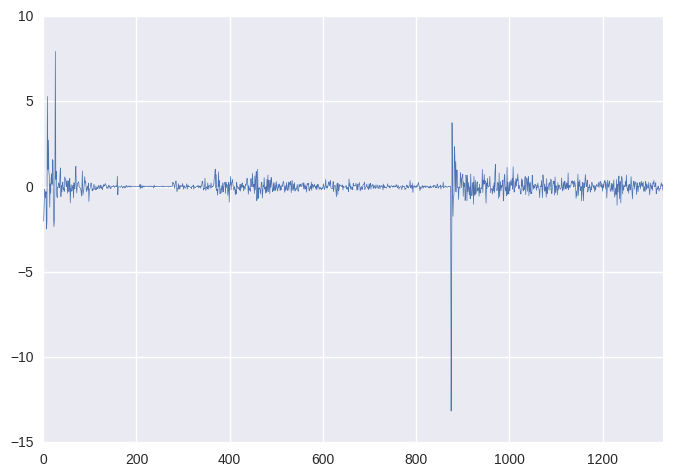

In [14]:
prices['CHFEURLogRtn'].plot(linewidth=.5)

#import plotly.plotly as py
#import plotly.graph_objs as go

#from datetime import datetime

#data = [go.Scatter(x=prices['Date'],y=prices['CHFEURLogRtn'])]
#py.iplot(data)

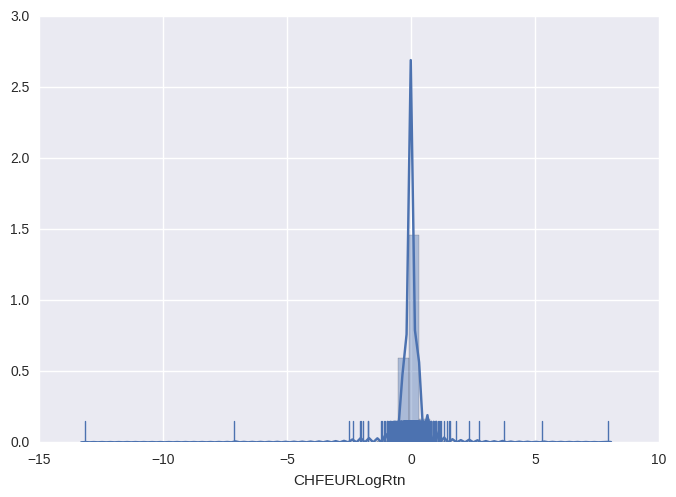

In [10]:
sns.distplot(prices['CHFEURLogRtn'][1::], kde=True, rug=True);

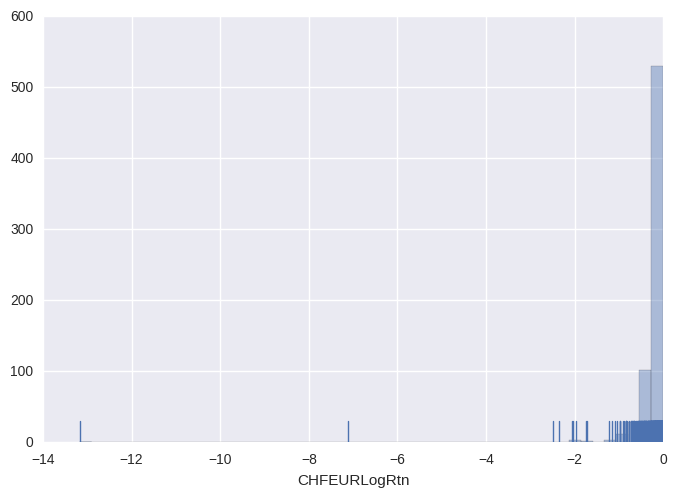

In [11]:
sns.distplot(prices['CHFEURLogRtn'][prices['CHFEURLogRtn']<0.], kde=False, rug=True);

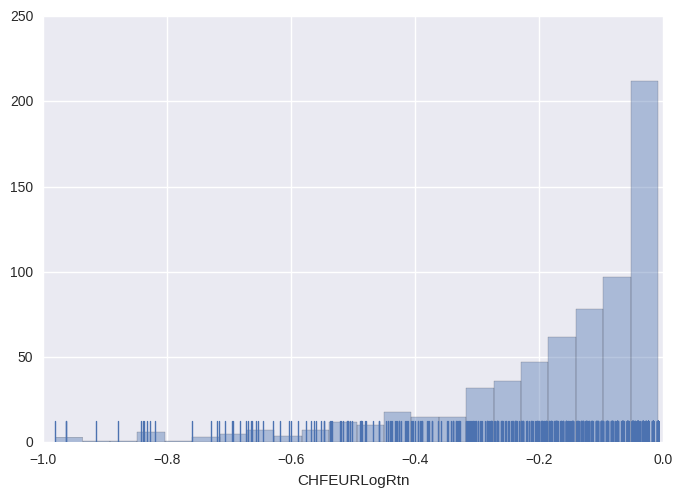

In [10]:
a = prices['CHFEURLogRtn'][prices['CHFEURLogRtn'] < .0]
a = a[a > -1.]

sns.distplot(a, kde=False, rug=True);

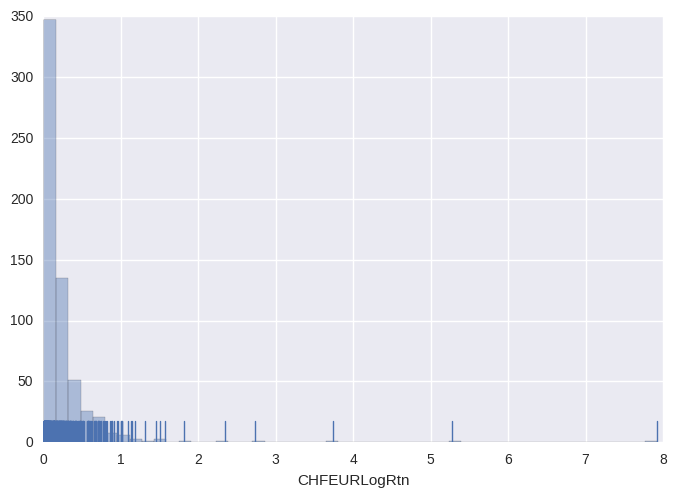

In [11]:
sns.distplot(prices['CHFEURLogRtn'][prices['CHFEURLogRtn'] > 0.], kde=False, rug=True);

In [163]:
# block maxima

m = len(prices['CHFEURLogRtn'])/63

a = [] #min

b = [] #max

for i in xrange(63):
    tmp = np.array(prices['CHFEURLogRtn'][(i * m):(((i+1) *m)-1)])
    a.append(np.min(tmp))
    b.append(np.max(tmp))


<Container object of 62 artists>

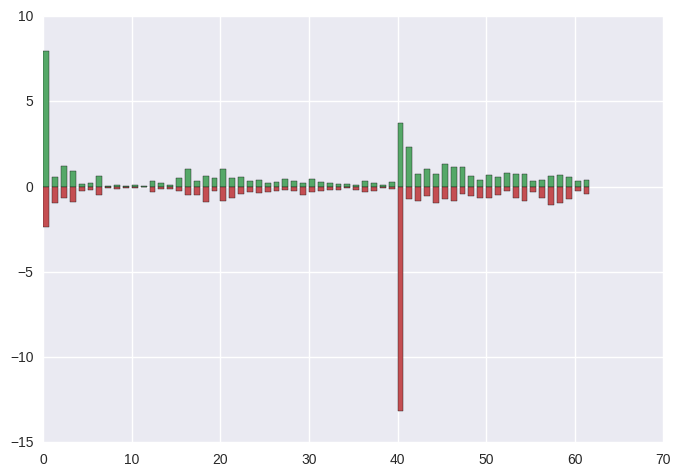

In [164]:
x = range(62)
width = 1/1.5
plt.bar(x, b[1::],width,color='g')
plt.bar(x, a[1::],width,color='r') 

((array([  1.01189369e-03,   2.45791449e-03,   3.92165248e-03,
           5.38753614e-03,   6.85557177e-03,   8.32576570e-03,
           9.79812428e-03,   1.12726539e-02,   1.27493610e-02,
           1.42282519e-02,   1.57093332e-02,   1.71926114e-02,
           1.86780929e-02,   2.01657844e-02,   2.16556924e-02,
           2.31478236e-02,   2.46421845e-02,   2.61387819e-02,
           2.76376225e-02,   2.91387129e-02,   3.06420600e-02,
           3.21476706e-02,   3.36555514e-02,   3.51657094e-02,
           3.66781514e-02,   3.81928844e-02,   3.97099153e-02,
           4.12292510e-02,   4.27508986e-02,   4.42748652e-02,
           4.58011578e-02,   4.73297835e-02,   4.88607495e-02,
           5.03940629e-02,   5.19297310e-02,   5.34677611e-02,
           5.50081602e-02,   5.65509359e-02,   5.80960954e-02,
           5.96436462e-02,   6.11935955e-02,   6.27459510e-02,
           6.43007199e-02,   6.58579100e-02,   6.74175287e-02,
           6.89795836e-02,   7.05440823e-02,   7.211103

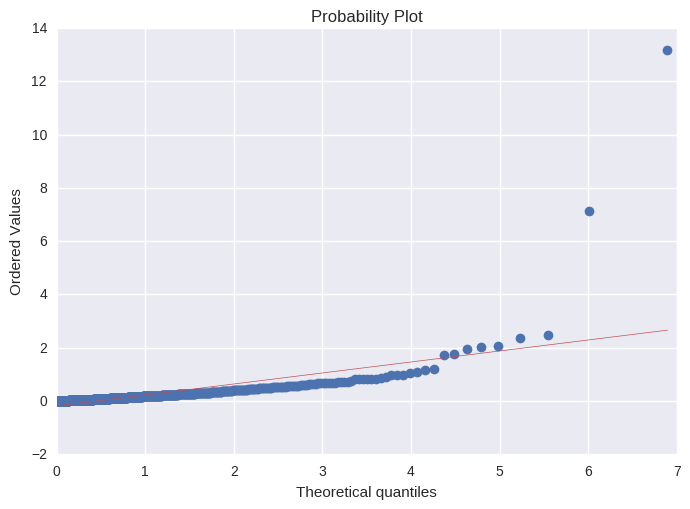

In [165]:
# QQ plot - generalized Pareto distr (GPD) - left tail
sns.set_context("notebook", font_scale=1., rc={"lines.linewidth": .5})
stats.probplot(-prices['CHFEURLogRtn'][prices['CHFEURLogRtn']<0.], dist=stats.expon, plot=plt)

((array([  1.14192287e-03,   2.77400692e-03,   4.42640141e-03,
           6.08153082e-03,   7.73940423e-03,   9.40003076e-03,
           1.10634195e-02,   1.27295798e-02,   1.43985208e-02,
           1.60702518e-02,   1.77447822e-02,   1.94221213e-02,
           2.11022786e-02,   2.27852636e-02,   2.44710858e-02,
           2.61597549e-02,   2.78512803e-02,   2.95456718e-02,
           3.12429392e-02,   3.29430922e-02,   3.46461407e-02,
           3.63520944e-02,   3.80609634e-02,   3.97727577e-02,
           4.14874872e-02,   4.32051621e-02,   4.49257924e-02,
           4.66493884e-02,   4.83759604e-02,   5.01055185e-02,
           5.18380732e-02,   5.35736349e-02,   5.53122139e-02,
           5.70538209e-02,   5.87984664e-02,   6.05461610e-02,
           6.22969153e-02,   6.40507402e-02,   6.58076464e-02,
           6.75676447e-02,   6.93307461e-02,   7.10969616e-02,
           7.28663020e-02,   7.46387786e-02,   7.64144024e-02,
           7.81931847e-02,   7.99751366e-02,   8.176026

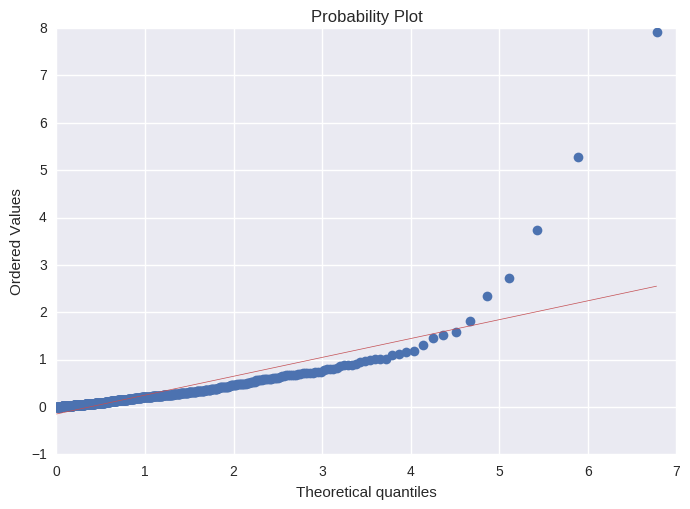

In [166]:
# QQ plot - generalized Pareto distr (GPD) - right tail
sns.set_context("notebook", font_scale=1., rc={"lines.linewidth": .5})
stats.probplot(prices['CHFEURLogRtn'][prices['CHFEURLogRtn']>0.], dist=stats.expon, plot=plt)

In [167]:
x = np.array(-prices['CHFEURLogRtn'][prices['CHFEURLogRtn']<0.])
y = np.array(prices['CHFEURLogRtn'][prices['CHFEURLogRtn']>0.])

In [168]:
x.sort()
y.sort()

([<matplotlib.axis.XTick at 0x7fb5fa2c4650>,
 <a list of 16 Text xticklabel objects>)

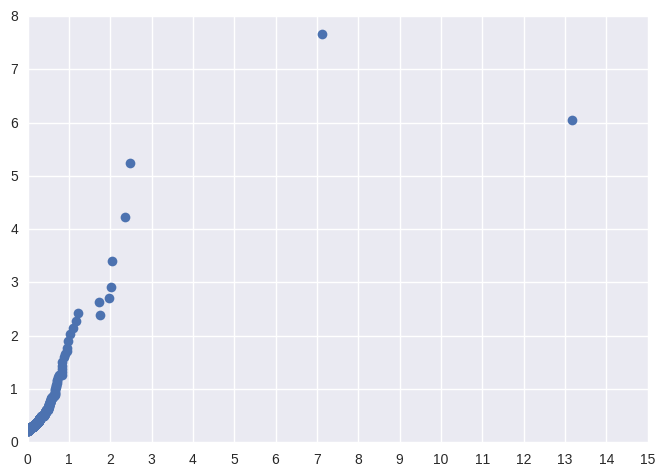

In [169]:

b = []

for i in xrange(len(x)-1):
    a = np.array(x[i+1::] - x[i])
    b.append(np.mean(a))
# mean excess plot - left tail
plt.plot(x[1::],b, 'bo')
plt.xticks(np.linspace(0, 15, 16, endpoint=True))

([<matplotlib.axis.XTick at 0x7fb5fa236990>,
 <a list of 11 Text xticklabel objects>)

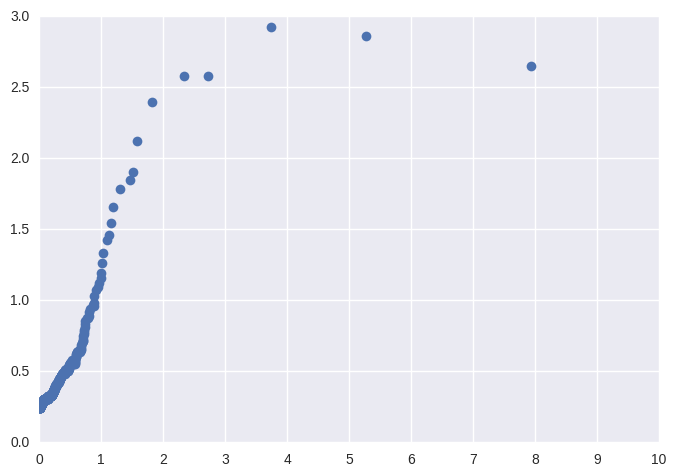

In [170]:

b = []

for i in xrange(len(y)-1):
    a = np.array(y[i+1::] - y[i])
    b.append(np.mean(a))
    
plt.plot(y[1::],b, 'bo')  # mean excess plot - right tail
plt.xticks(np.linspace(0, 10, 11, endpoint=True))

In [70]:
# Hill plot - left tail

In [22]:
x = np.array(-prices['CHFEURLogRtn'][prices['CHFEURLogRtn']<0.])

x = np.sort(x)[::-1]

bl = [] # Hill estimate 
a = []

n = len(x)

for i in xrange(n):    
    a.append(x[i])
    c = []
    for j in xrange(len(a)):
        c.append(np.log(a[j]))
    bl.append([i, 1./(np.mean(c) - np.log(x[i]))]) 

In [23]:
bl1 = [bl[i][1] for i in xrange(len(bl))]
k = [bl[i][0] for i in xrange(len(bl))]

([<matplotlib.axis.YTick at 0x7fb609fff550>,
 <a list of 21 Text yticklabel objects>)

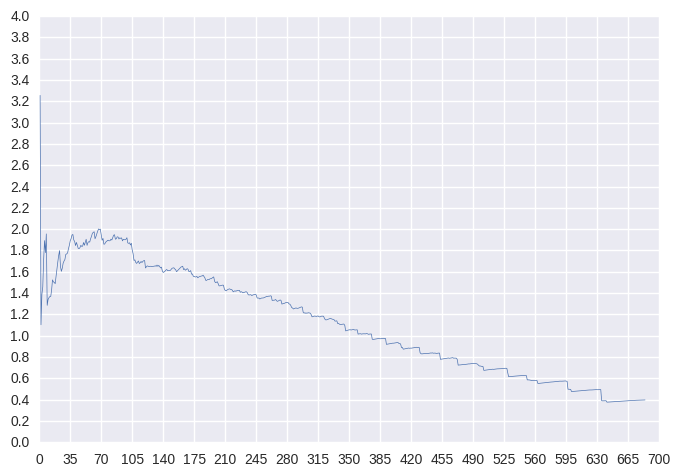

In [25]:
plt.plot(k, bl1,linewidth=.5)
plt.xticks(np.linspace(0, 700, 21, endpoint=True))
plt.yticks(np.linspace(0, 4., 21, endpoint=True))

In [26]:
x[35:105]

array([ 0.66274175,  0.65695355,  0.65386796,  0.64591149,  0.62846787,
        0.61767841,  0.60285315,  0.60037346,  0.58847738,  0.57604916,
        0.56853923,  0.56343297,  0.56063523,  0.55257085,  0.5468951 ,
        0.54649922,  0.53664865,  0.53538185,  0.53448484,  0.52056338,
        0.51956603,  0.515859  ,  0.51045723,  0.51027887,  0.50886585,
        0.50844489,  0.50535321,  0.502066  ,  0.48926938,  0.48796453,
        0.48754383,  0.48698354,  0.48586061,  0.48157462,  0.47860193,
        0.46864317,  0.45875849,  0.4576667 ,  0.44735525,  0.44442722,
        0.443588  ,  0.44090937,  0.43940019,  0.43662107,  0.43300081,
        0.43035499,  0.42928321,  0.42556738,  0.42554964,  0.4254932 ,
        0.4234564 ,  0.41614708,  0.41407927,  0.41370978,  0.411166  ,
        0.40666994,  0.40558135,  0.40264187,  0.40095519,  0.39560289,
        0.3950503 ,  0.39256909,  0.39027613,  0.38872741,  0.38822436,
        0.3808911 ,  0.37851261,  0.37708529,  0.3728672 ,  0.37

([<matplotlib.axis.YTick at 0x7fb60ac56550>,
 <a list of 21 Text yticklabel objects>)

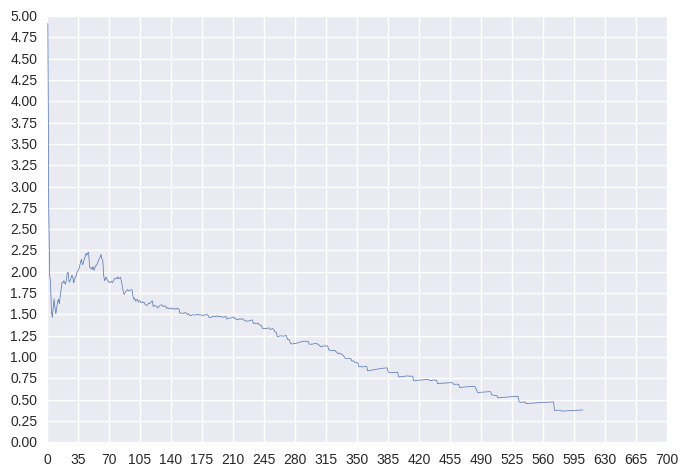

In [44]:
# Hill plot - right tail

y = np.array(prices['CHFEURLogRtn'][prices['CHFEURLogRtn']>0.])

y = np.sort(y)[::-1]

br = [] # Hill estimate 
a = []

for i in xrange(len(y)-1):
    a.append(y[i])
    c = []
    for j in xrange(len(a)):
        c.append(np.log(a[j]))
    br.append([i, 1./(np.mean(c) - np.log(y[i] ))])
    
br1 = [br[i][1] for i in xrange(len(br))]
k = [br[i][0] for i in xrange(len(br))]    
    
plt.plot(k, br1,linewidth=.5)
plt.xticks(np.linspace(0, 700, 21, endpoint=True))
plt.yticks(np.linspace(0, 5., 21, endpoint=True))

In [29]:
# alternative Hill plot - left tail

n = len(bl)
m = 1000

d = np.linspace(0., 1., num=m)

el = []

for i in xrange(m):
    
    f = 0
    for j in xrange(n):
        if n**d[i] >= j: 
            f = j
            
    el.append(bl1[f])



([<matplotlib.axis.XTick at 0x7fb60b50c890>,
 <a list of 21 Text xticklabel objects>)

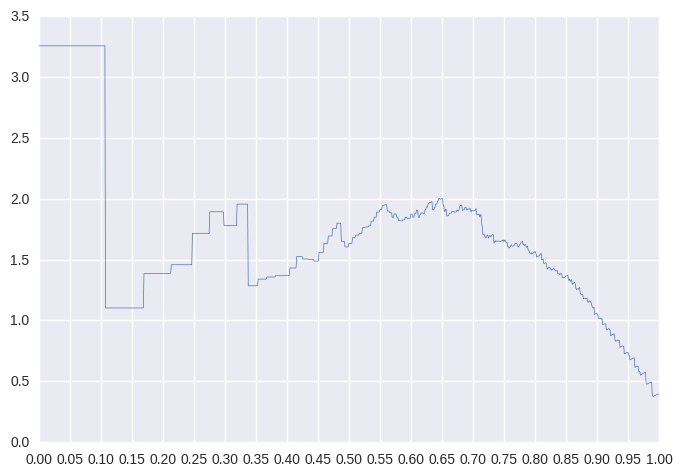

In [31]:
plt.plot(d, el)
plt.xticks(np.linspace(0, 1., 21, endpoint=True))

In [32]:
x[int(n**.65)]

0.47860192599364082

([<matplotlib.axis.XTick at 0x7fb60bd47850>,
 <a list of 21 Text xticklabel objects>)

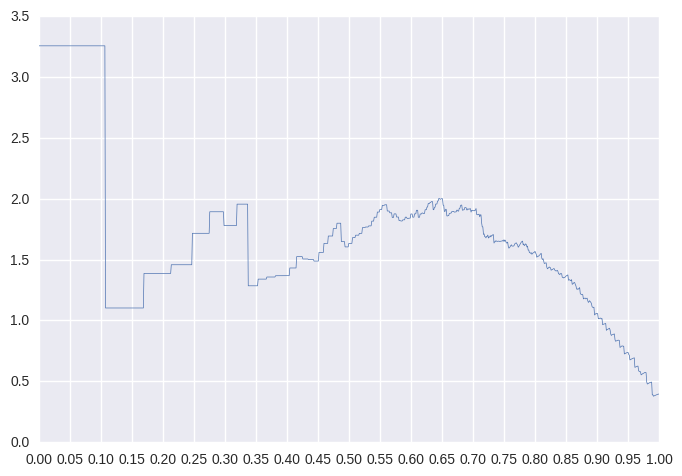

In [33]:
# alternative Hill plot - right tail

n = len(br)
m = 1000

d = np.linspace(0., 1., num=m)

er = []

for i in xrange(m):
    
    f = 0
    for j in xrange(n):
        if n**d[i] >= j: 
            f = j
            
    er.append(br1[f])
    
plt.plot(d, er)
plt.xticks(np.linspace(0, 1., 21, endpoint=True))

In [34]:
# percentage Hill - left tail 

n = len(bl)
epsilon = 1.e-2

h = []


for i in xrange(n):

    g = 0.
    for j in xrange(n):
        if np.absolute(bl1[j] - bl1[i]) <= epsilon:
            g += 1
    
    h.append(g/n)
    
    

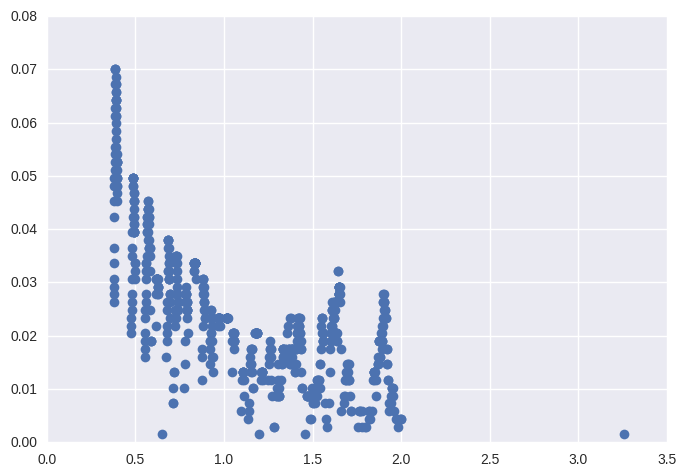

In [35]:
plt.plot(bl1,h, 'bo')

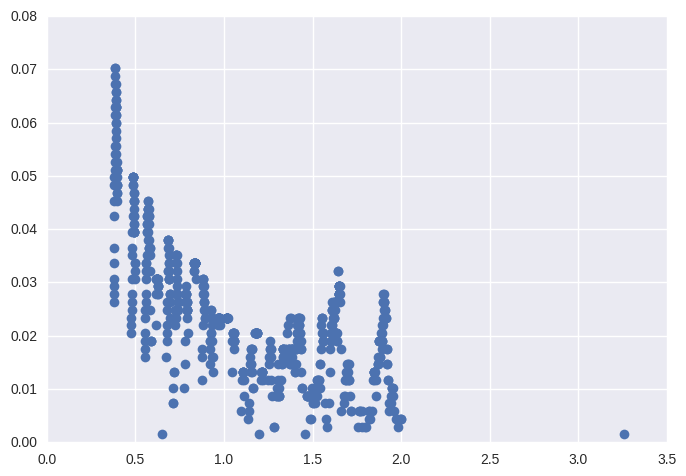

In [36]:
# percentage Hill - right tail 

n = len(br)
epsilon = 1.e-2

h = []


for i in xrange(n):

    g = 0.
    for j in xrange(n):
        if np.absolute(br1[j] - br1[i]) <= epsilon:
            g += 1
    
    h.append(g/n)
    
plt.plot( br1,h,'bo')

((array([  1.14380723e-03,   2.77858809e-03,   4.43371751e-03,
           6.09159092e-03,   7.75221744e-03,   9.41560623e-03,
           1.10817665e-02,   1.27507075e-02,   1.44224385e-02,
           1.60969689e-02,   1.77743080e-02,   1.94544653e-02,
           2.11374503e-02,   2.28232725e-02,   2.45119415e-02,
           2.62034670e-02,   2.78978585e-02,   2.95951259e-02,
           3.12952789e-02,   3.29983273e-02,   3.47042811e-02,
           3.64131501e-02,   3.81249444e-02,   3.98396739e-02,
           4.15573488e-02,   4.32779791e-02,   4.50015751e-02,
           4.67281471e-02,   4.84577052e-02,   5.01902599e-02,
           5.19258215e-02,   5.36644006e-02,   5.54060076e-02,
           5.71506531e-02,   5.88983476e-02,   6.06491020e-02,
           6.24029269e-02,   6.41598331e-02,   6.59198314e-02,
           6.76829328e-02,   6.94491482e-02,   7.12184887e-02,
           7.29909653e-02,   7.47665891e-02,   7.65453714e-02,
           7.83273233e-02,   8.01124563e-02,   8.190078

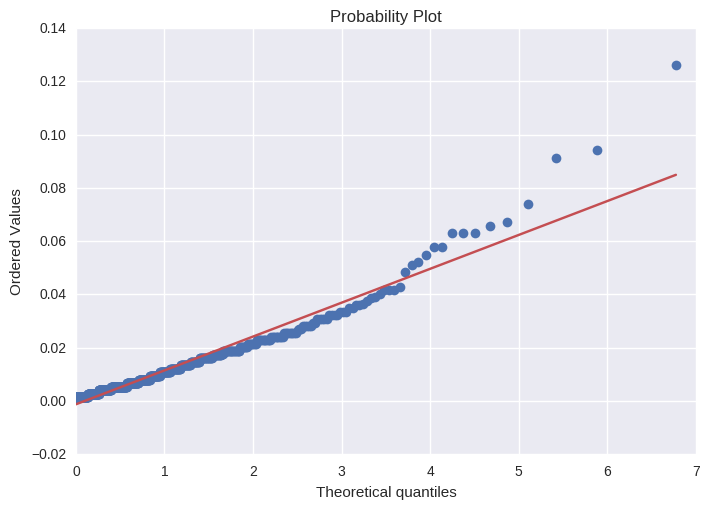

In [6]:
# QQ plot
prices['DKKEURLogRtn'] = np.log(prices['DKKEUR'].shift(1)) - np.log(prices['DKKEUR'])
prices['DKKEURLogRtn'] *= -100. 

stats.probplot(-prices['DKKEURLogRtn'][prices['DKKEURLogRtn']<0.], dist=stats.expon, plot=plt)

([<matplotlib.axis.XTick at 0x7fb60a8cf910>,
 <a list of 16 Text xticklabel objects>)

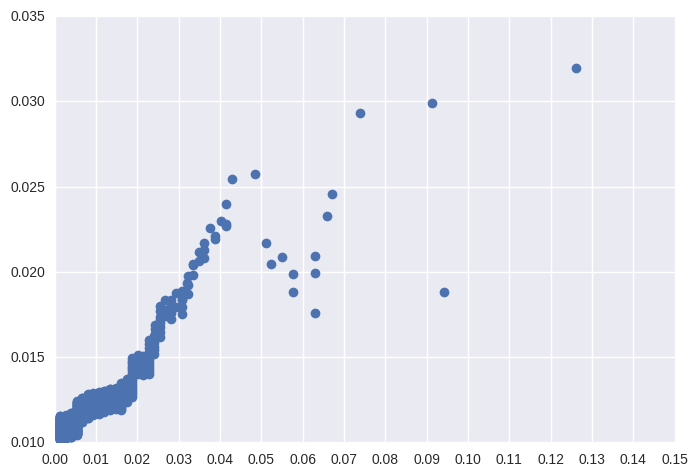

In [51]:
# mean excess plot - left rail
x = np.array(-prices['DKKEURLogRtn'][prices['DKKEURLogRtn']<0.])
x.sort()
b = []

for i in xrange(len(x)-1):
    a = np.array(x[i+1::] - x[i])
    b.append(np.mean(a))
    
plt.plot(x[1::],b, 'bo')  # mean excess plot - left tail  
plt.xticks(np.linspace(0, .15, 16, endpoint=True))

([<matplotlib.axis.XTick at 0x7fb60ab0bf10>,
 <a list of 21 Text xticklabel objects>)

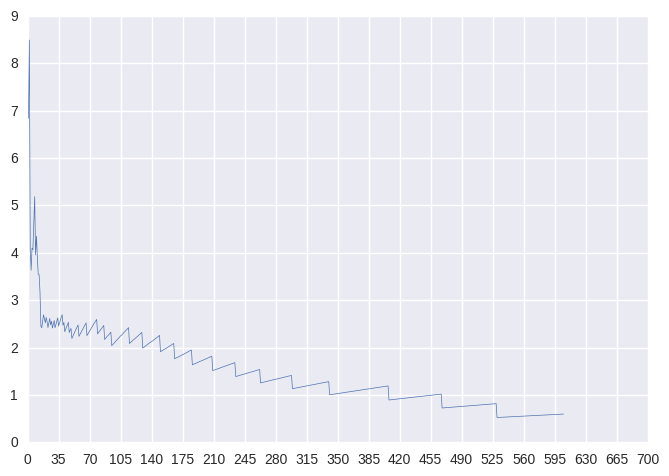

In [53]:
x = np.array(-prices['DKKEURLogRtn'][prices['DKKEURLogRtn']<0.])

x = np.sort(x)[::-1]

bl = [] # Hill estimate 
a = []

n = len(x)

for i in xrange(n):    
    a.append(x[i])
    c = []
    for j in xrange(len(a)):
        c.append(np.log(a[j]))
    bl.append([i, 1./(np.mean(c) - np.log(x[i]))]) 
    
bl1 = [bl[i][1] for i in xrange(len(bl))]
k = [bl[i][0] for i in xrange(len(bl))]    
    
plt.plot(k, bl1,linewidth=.5)
plt.xticks(np.linspace(0, 700, 21, endpoint=True))
#plt.yticks(np.linspace(0, 5., 21, endpoint=True))   

In [54]:
x[35:105]

array([ 0.03093248,  0.03091169,  0.03089301,  0.03086109,  0.03078962,
        0.02948232,  0.02947126,  0.02822107,  0.02821955,  0.02820856,
        0.02814617,  0.02814504,  0.02687558,  0.02687414,  0.02682799,
        0.02554433,  0.02553129,  0.02552751,  0.02552614,  0.02552614,
        0.02550524,  0.02548676,  0.02546968,  0.02419875,  0.0241955 ,
        0.02418445,  0.02416302,  0.02416075,  0.02415816,  0.02414487,
        0.0241261 ,  0.02412287,  0.02285422,  0.02285054,  0.02284839,
        0.02284624,  0.0228447 ,  0.02284317,  0.02283703,  0.02283611,
        0.0228214 ,  0.02279875,  0.02278988,  0.02277675,  0.0215155 ,
        0.02150942,  0.02150538,  0.02147622,  0.02146902,  0.02146009,
        0.02144542,  0.02142733,  0.02017037,  0.02016929,  0.0201682 ,
        0.02016224,  0.02012329,  0.02011223,  0.02010603,  0.02010603,
        0.0188367 ,  0.01883518,  0.01883442,  0.0188329 ,  0.01882986,
        0.01882682,  0.01882378,  0.01881645,  0.01881265,  0.01

([<matplotlib.axis.XTick at 0x7fb60a9d7f90>,
 <a list of 21 Text xticklabel objects>)

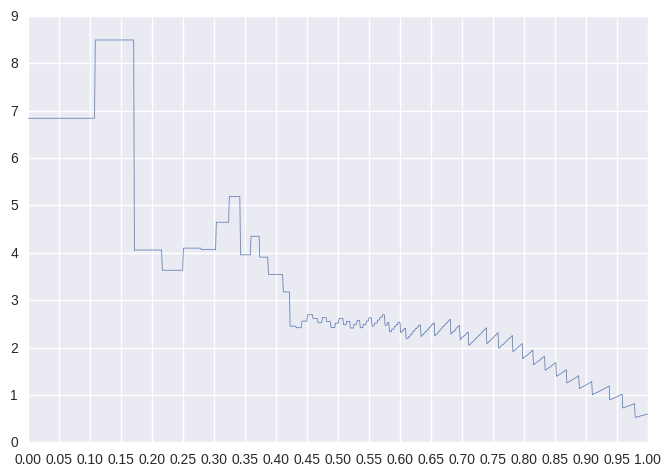

In [55]:
# alternative Hill plot - left tail

n = len(bl)
m = 1000

d = np.linspace(0., 1., num=m)

e = []

for i in xrange(m):
    
    f = 0
    for j in xrange(n):
        if n**d[i] >= j: 
            f = j
            
    e.append(bl1[f])
plt.plot(d, e)
plt.xticks(np.linspace(0, 1., 21, endpoint=True))

In [56]:
x[int(n ** .5)]

0.036218032951884638

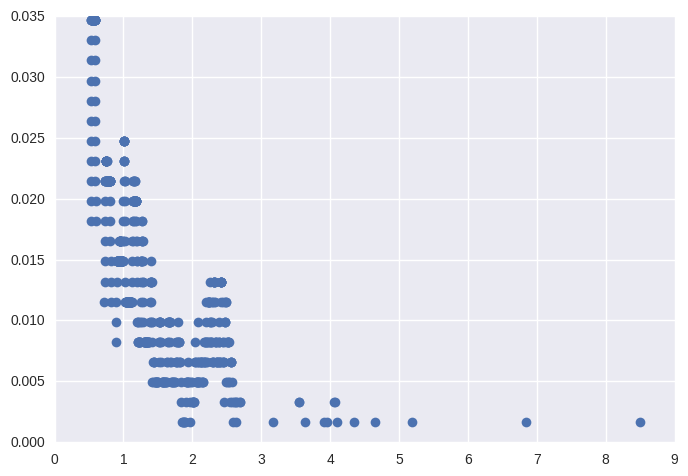

In [57]:
# percentage Hill - left tail 

n = len(bl)
epsilon = 1.e-2

h = []


for i in xrange(n):

    g = 0.
    for j in xrange(n):
        if np.absolute(bl1[j] - bl1[i]) <= epsilon:
            g += 1
    
    h.append(g/n)
    
    
plt.plot(bl1, h,'bo')

((array([  1.02385108e-03,   2.48697975e-03,   3.96806106e-03,
           5.45133923e-03,   6.93682078e-03,   8.42451227e-03,
           9.91442028e-03,   1.14065514e-02,   1.29009124e-02,
           1.43975098e-02,   1.58963503e-02,   1.73974408e-02,
           1.89007879e-02,   2.04063984e-02,   2.19142793e-02,
           2.34244373e-02,   2.49368793e-02,   2.64516122e-02,
           2.79686431e-02,   2.94879788e-02,   3.10096265e-02,
           3.25335930e-02,   3.40598856e-02,   3.55885113e-02,
           3.71194773e-02,   3.86527908e-02,   4.01884589e-02,
           4.17264889e-02,   4.32668881e-02,   4.48096638e-02,
           4.63548233e-02,   4.79023740e-02,   4.94523234e-02,
           5.10046788e-02,   5.25594478e-02,   5.41166378e-02,
           5.56762565e-02,   5.72383114e-02,   5.88028101e-02,
           6.03697603e-02,   6.19391697e-02,   6.35110461e-02,
           6.50853971e-02,   6.66622305e-02,   6.82415544e-02,
           6.98233764e-02,   7.14077046e-02,   7.299454

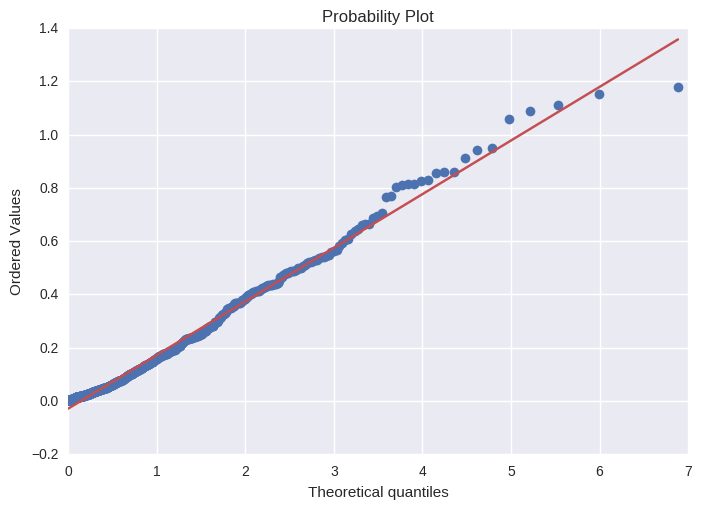

In [7]:
# QQ plot

prices['CZKEURLogRtn'] = np.log(prices['CZKEUR']).shift(1) - np.log(prices['CZKEUR'])
prices['CZKEURLogRtn'] *= -100. 
#stats.probplot(-prices['CZKEURLogRtn'][prices['CZKEURLogRtn']<0.], dist=stats.genpareto(.1), plot=plt)
stats.probplot(-prices['CZKEURLogRtn'][prices['CZKEURLogRtn']<0.], dist=stats.expon, plot=plt)

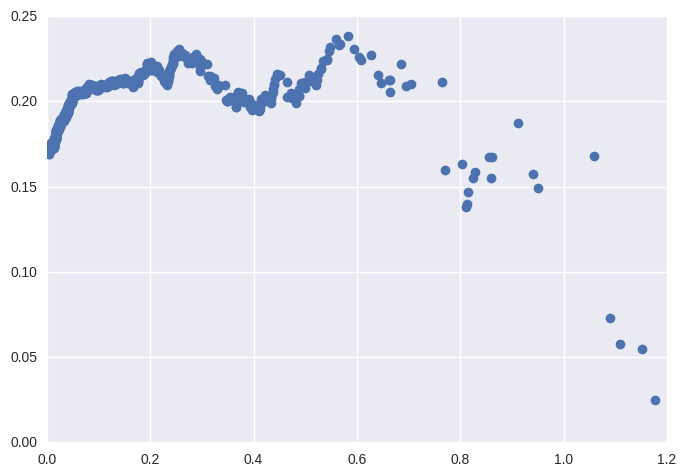

In [74]:
# mean excess plot - left rail
x = np.array(-prices['CZKEURLogRtn'][prices['CZKEURLogRtn']<0.])
x.sort()
b = []

for i in xrange(len(x)-1):
    a = np.array(x[i+1::] - x[i])
    b.append(np.mean(a))
    
plt.plot(x[1::],b, 'bo')  # mean excess plot - left tail  
#plt.xticks(np.linspace(0, .15, 16, endpoint=True))

(0, 5)

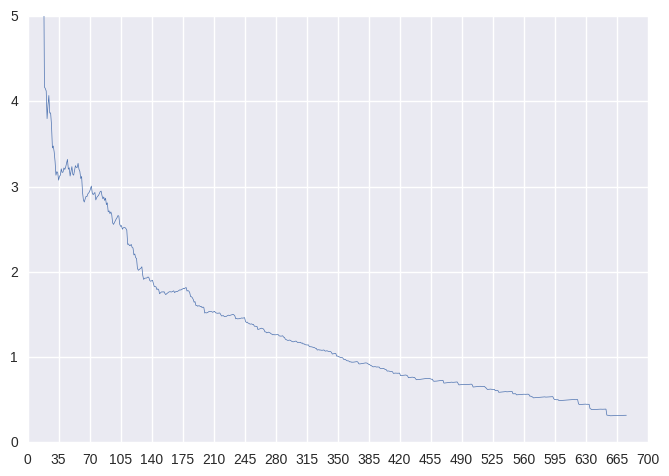

In [77]:
# Hill plot - left tail
x = np.array(-prices['CZKEURLogRtn'][prices['CZKEURLogRtn']<0.])

x = np.sort(x)[::-1]

bl = [] # Hill estimate 
a = []

n = len(x)

for i in xrange(n):    
    a.append(x[i])
    c = []
    for j in xrange(len(a)):
        c.append(np.log(a[j]))
    bl.append([i, 1./(np.mean(c) - np.log(x[i]))]) 
    
bl1 = [bl[i][1] for i in xrange(len(bl))]
k = [bl[i][0] for i in xrange(len(bl))]    
    
plt.plot(k, bl1,linewidth=.5)
plt.xticks(np.linspace(0, 700, 21, endpoint=True))
plt.ylim([0, 5])
#plt.yticks(np.linspace(0, 5., 21, endpoint=True))     

In [78]:
x[35:70]

array([ 0.54853157,  0.5462935 ,  0.54228363,  0.54187717,  0.53523767,
        0.5312774 ,  0.52977658,  0.52491423,  0.52262531,  0.52129327,
        0.51989719,  0.51074641,  0.50825006,  0.50000104,  0.49975481,
        0.49920864,  0.49178205,  0.48817734,  0.48793371,  0.48787584,
        0.48415668,  0.48149823,  0.48111712,  0.47536648,  0.47168948,
        0.46517405,  0.46390548,  0.45213225,  0.44478663,  0.44092824,
        0.44054667,  0.43984946,  0.43744602,  0.43684229,  0.43531611])

([<matplotlib.axis.XTick at 0x7fb6094bf5d0>,
 <a list of 21 Text xticklabel objects>)

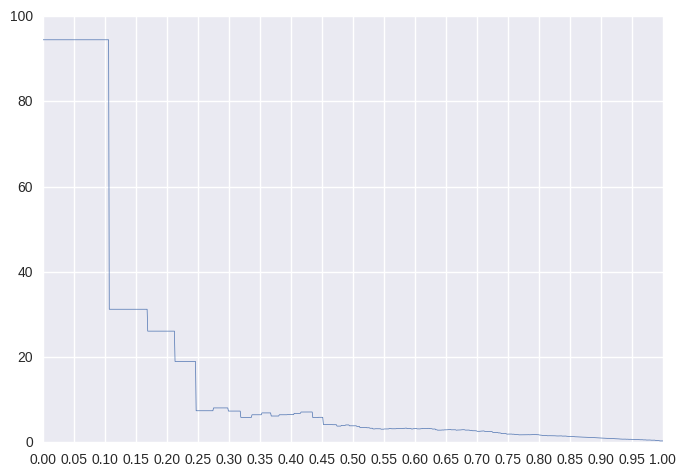

In [79]:
# alternative Hill plot - left tail

n = len(bl)
m = 1000

d = np.linspace(0., 1., num=m)

e = []

for i in xrange(m):
    
    f = 0
    for j in xrange(n):
        if n**d[i] >= j: 
            f = j
            
    e.append(bl1[f])
plt.plot(d, e)
plt.xticks(np.linspace(0, 1., 21, endpoint=True))

In [82]:
x[int(n**.55)]

0.54629350260517739

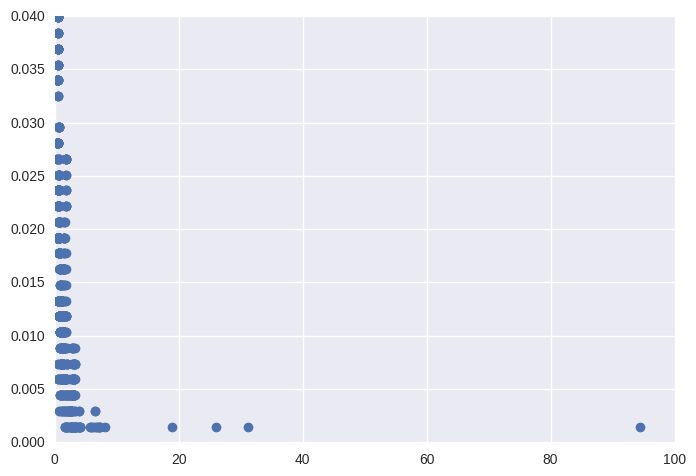

In [83]:
# percentage Hill - left tail 

n = len(bl)
epsilon = 1.e-2

h = []


for i in xrange(n):

    g = 0.
    for j in xrange(n):
        if np.absolute(bl1[j] - bl1[i]) <= epsilon:
            g += 1
    
    h.append(g/n)
    
    
plt.plot(bl1, h,'bo')
    


((array([  1.22898436e-03,   2.98567940e-03,   4.76446167e-03,
           6.54641364e-03,   8.33154664e-03,   1.01198720e-02,
           1.19114013e-02,   1.37061458e-02,   1.55041173e-02,
           1.73053273e-02,   1.91097875e-02,   2.09175097e-02,
           2.27285057e-02,   2.45427873e-02,   2.63603665e-02,
           2.81812553e-02,   3.00054658e-02,   3.18330102e-02,
           3.36639005e-02,   3.54981492e-02,   3.73357685e-02,
           3.91767709e-02,   4.10211689e-02,   4.28689749e-02,
           4.47202016e-02,   4.65748618e-02,   4.84329680e-02,
           5.02945333e-02,   5.21595705e-02,   5.40280925e-02,
           5.59001125e-02,   5.77756434e-02,   5.96546986e-02,
           6.15372913e-02,   6.34234349e-02,   6.53131427e-02,
           6.72064282e-02,   6.91033051e-02,   7.10037870e-02,
           7.29078876e-02,   7.48156206e-02,   7.67270001e-02,
           7.86420400e-02,   8.05607543e-02,   8.24831571e-02,
           8.44092627e-02,   8.63390853e-02,   8.827263

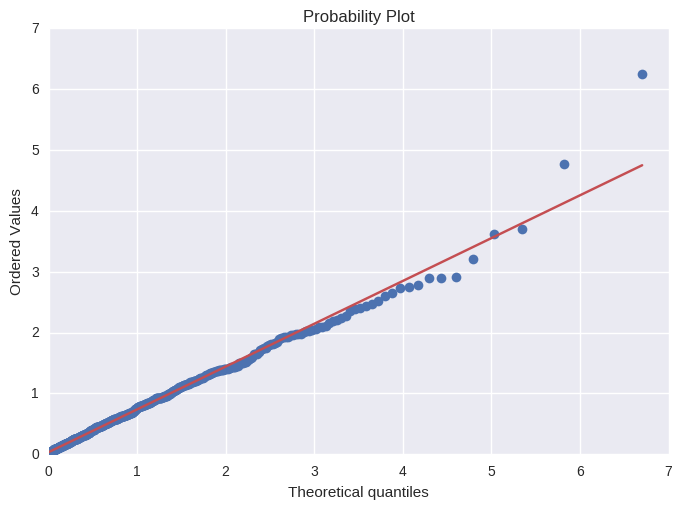

In [8]:
# QQ plot


prices['BRLUSDLogRtn'] = np.log(prices['BRLUSD'].shift(1)) - np.log(prices['BRLUSD'])
prices['BRLUSDLogRtn'] *= -100.
#stats.probplot(-prices['BRLUSDLogRtn'][prices['BRLUSDLogRtn']<0.], dist=stats.genpareto(.1), plot=plt)
stats.probplot(-prices['BRLUSDLogRtn'][prices['BRLUSDLogRtn']<0.], dist=stats.expon, plot=plt)

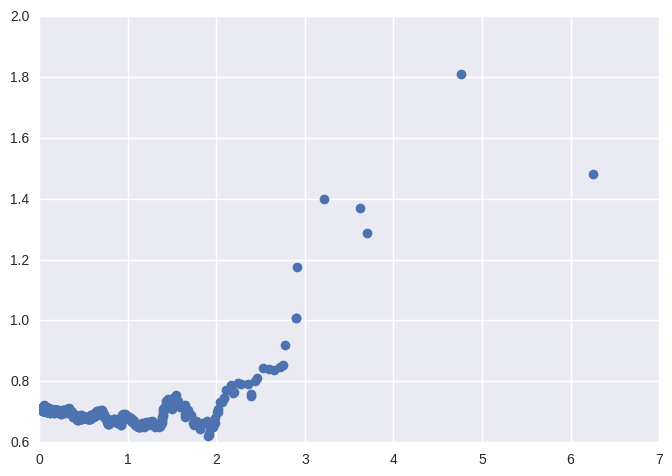

In [85]:
# mean excess plot
x = np.array(-prices['BRLUSDLogRtn'][prices['BRLUSDLogRtn']<0.])
x.sort()
b = []

for i in xrange(len(x)-1):
    a = np.array(x[i+1::] - x[i])
    b.append(np.mean(a))
    
plt.plot(x[1::],b, 'bo')  # mean excess plot - left tail  

([<matplotlib.axis.YTick at 0x7fb608cc2d90>,
 <a list of 21 Text yticklabel objects>)

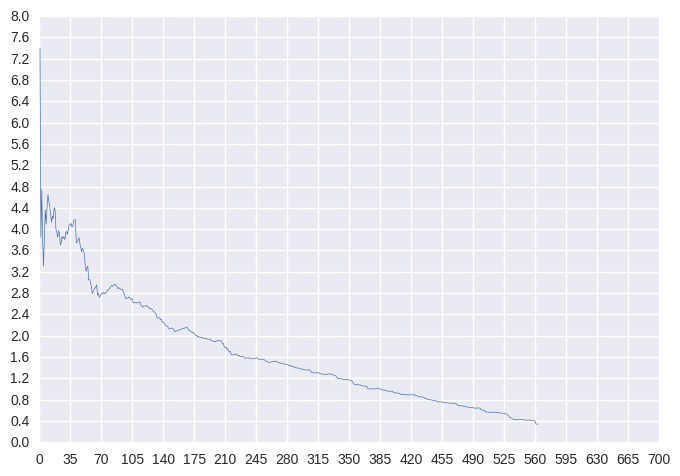

In [88]:
# Hill plot - left tail
x = np.array(-prices['BRLUSDLogRtn'][prices['BRLUSDLogRtn']<0.])

x = np.sort(x)[::-1]

bl = [] # Hill estimate 
a = []

n = len(x)

for i in xrange(n):    
    a.append(x[i])
    c = []
    for j in xrange(len(a)):
        c.append(np.log(a[j]))
    bl.append([i, 1./(np.mean(c) - np.log(x[i]))]) 
    
bl1 = [bl[i][1] for i in xrange(len(bl))]
k = [bl[i][0] for i in xrange(len(bl))]    
    
plt.plot(k, bl1,linewidth=.5)
plt.xticks(np.linspace(0, 700, 21, endpoint=True))
#plt.ylim([0, 5])
plt.yticks(np.linspace(0, 8., 21, endpoint=True))     

In [89]:
x[75:105]

array([ 1.39792591,  1.39389796,  1.39330943,  1.39073845,  1.38611654,
        1.38487806,  1.38229816,  1.37973714,  1.37145007,  1.36899981,
        1.36676387,  1.35898034,  1.35442251,  1.34334234,  1.33264232,
        1.33058096,  1.32285394,  1.31599267,  1.31016105,  1.30572392,
        1.29495   ,  1.28242627,  1.26935461,  1.25739893,  1.25464087,
        1.24906422,  1.24890116,  1.24284583,  1.23334419,  1.22738577])

([<matplotlib.axis.XTick at 0x7fb608f7a610>,
 <a list of 21 Text xticklabel objects>)

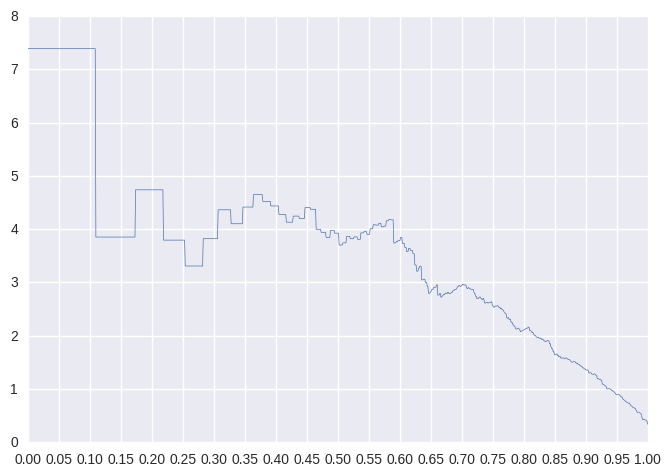

In [90]:
# alternative Hill plot - left tail

n = len(bl)
m = 1000

d = np.linspace(0., 1., num=m)

e = []

for i in xrange(m):
    
    f = 0
    for j in xrange(n):
        if n**d[i] >= j: 
            f = j
            
    e.append(bl1[f])
plt.plot(d, e)
plt.xticks(np.linspace(0, 1., 21, endpoint=True))

In [92]:
x[int(n**.55)]

1.9838342219664185

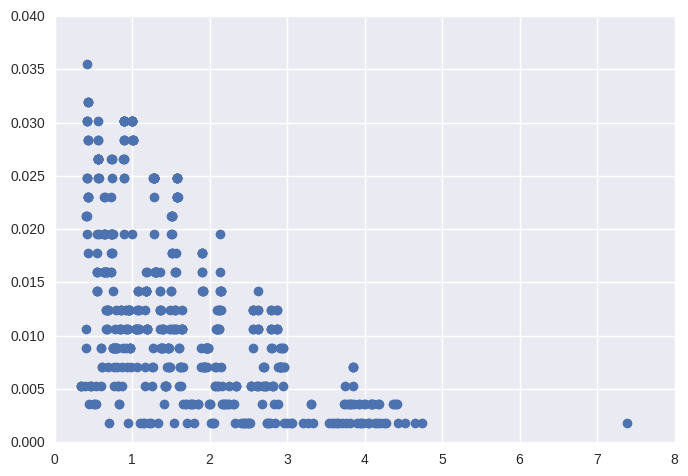

In [93]:
# percentage Hill - left tail 

n = len(bl)
epsilon = 1.e-2

h = []


for i in xrange(n):

    g = 0.
    for j in xrange(n):
        if np.absolute(bl1[j] - bl1[i]) <= epsilon:
            g += 1
    
    h.append(g/n)
    
    
plt.plot(bl1, h,'bo')
    

CHFEUR

In [4]:
data = pd.read_csv('../data/var_risk_metrics_CHFEUR_252.csv')

In [5]:
data.head(10)

Riskmetrics    GARCH  HistSimul  HistSimulWght  HistSimulVolWght  POTPareto
0    -0.026933 -1.72944  -0.660550      -0.091484         -0.037394  -0.552015
1    -0.017438 -1.29544  -0.643830      -0.091484         -0.032434  -0.538848
2    -0.012291 -1.23123  -0.586749      -0.091484         -0.028885  -0.525503
3    -0.010771 -1.50012  -0.586749      -0.091484         -0.028613  -0.525503
4    -0.007665 -1.84427  -0.586749      -0.091484         -0.028012  -0.525503
5    -0.004190 -2.28589  -0.559067      -0.091484         -0.027227  -0.511967
6    -0.002669 -2.94809  -0.559067      -0.091408         -0.026680  -0.511967
7    -0.002669 -3.17003  -0.509157      -0.091408         -0.026118  -0.498224
8    -0.002669 -3.73512  -0.500808      -0.091408         -0.024840  -0.484255
9    -0.003326 -1.73673  -0.500808      -0.091233         -0.026923  -0.484255

In [6]:
data.tail(10)

Riskmetrics     GARCH  HistSimul  HistSimulWght  HistSimulVolWght  \
1068    -0.333558 -0.859682  -0.561849      -0.457708         -0.411908   
1069    -0.344360 -0.880196  -0.561849      -0.457708         -0.400031   
1070    -0.337148 -0.951441  -0.561849      -0.432065         -0.409775   
1071    -0.328318 -0.905218  -0.507155      -0.432065         -0.402032   
1072    -0.325712 -0.808483  -0.507155      -0.432065         -0.394734   
1073    -0.319476 -0.790170  -0.507155      -0.432065         -0.387834   
1074    -0.322220 -0.805112  -0.507155      -0.428363         -0.379086   
1075    -0.311323 -0.801585  -0.507155      -0.428363         -0.382774   
1076    -0.305292 -0.825945  -0.507155      -0.428363         -0.371012   
1077    -0.301514 -0.845872  -0.507155      -0.428363         -0.363605   

      POTPareto  
1068  -0.525503  
1069  -0.525503  
1070  -0.525503  
1071  -0.511967  
1072  -0.511967  
1073  -0.511967  
1074  -0.511967  
1075  -0.511967  
1076  -0.511967  
1077  -0.511967

In [7]:
data.describe()

Riskmetrics        GARCH    HistSimul  HistSimulWght  HistSimulVolWght  \
count  1078.000000  1078.000000  1078.000000    1078.000000       1078.000000   
mean     -0.557692    -0.879400    -0.417925      -0.423151         -0.446614   
std       0.748762     0.501556     0.158190       0.238120          0.538289   
min      -5.984070    -9.666200    -0.660550      -1.732800         -4.372870   
25%      -0.596722    -0.828732    -0.561849      -0.561849         -0.480989   
50%      -0.380078    -0.797959    -0.424645      -0.424645         -0.352556   
75%      -0.225005    -0.766874    -0.261523      -0.197044         -0.199695   
max      -0.002669    -0.737740    -0.132439      -0.074894         -0.016221   

         POTPareto  
count  1078.000000  
mean     -0.519301  
std       0.061293  
min      -0.687806  
25%      -0.538848  
50%      -0.478600  
75%      -0.478600  
max      -0.478600

In [15]:
b = 'CHFEUR' # 'CHFEUR' 'DKKPLN' 'CZKEUR' 'PLNEUR'

In [16]:
c = -15.e+0

In [17]:
d = b + 'LogRtn'
#prices[d] = (np.log(prices[b].shift(1)) - np.log(prices[b])) * 100.

In [18]:
a = len(prices[d]) - len(data)
a

253

([<matplotlib.axis.XTick at 0x7f399902e2d0>,
 <a list of 13 Text xticklabel objects>)

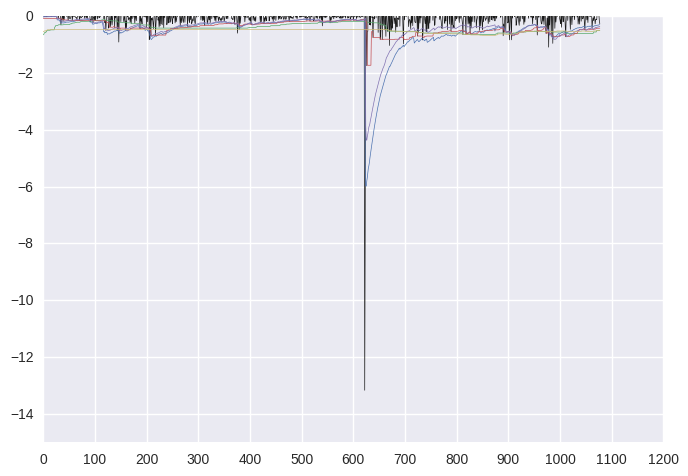

In [30]:
plt.plot(prices[d][a:].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['Riskmetrics'],linewidth=.5)
#plt.plot(data['GARCH'],linewidth=.5)
plt.plot(data['HistSimul'],linewidth=.5)
plt.plot(data['HistSimulWght'],linewidth=.5)
plt.plot(data['HistSimulVolWght'],linewidth=.5)
plt.plot(data['POTPareto'],linewidth=.5)

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

In [20]:
data1 = pd.read_csv('../data/var_risk_metrics_CHFEUR_63.csv')
data2 = pd.read_csv('../data/var_risk_metrics_CHFEUR_126.csv')
data3 = pd.read_csv('../data/var_risk_metrics_CHFEUR_189.csv')

([<matplotlib.axis.XTick at 0x7f399aaa5a10>,
 <a list of 13 Text xticklabel objects>)

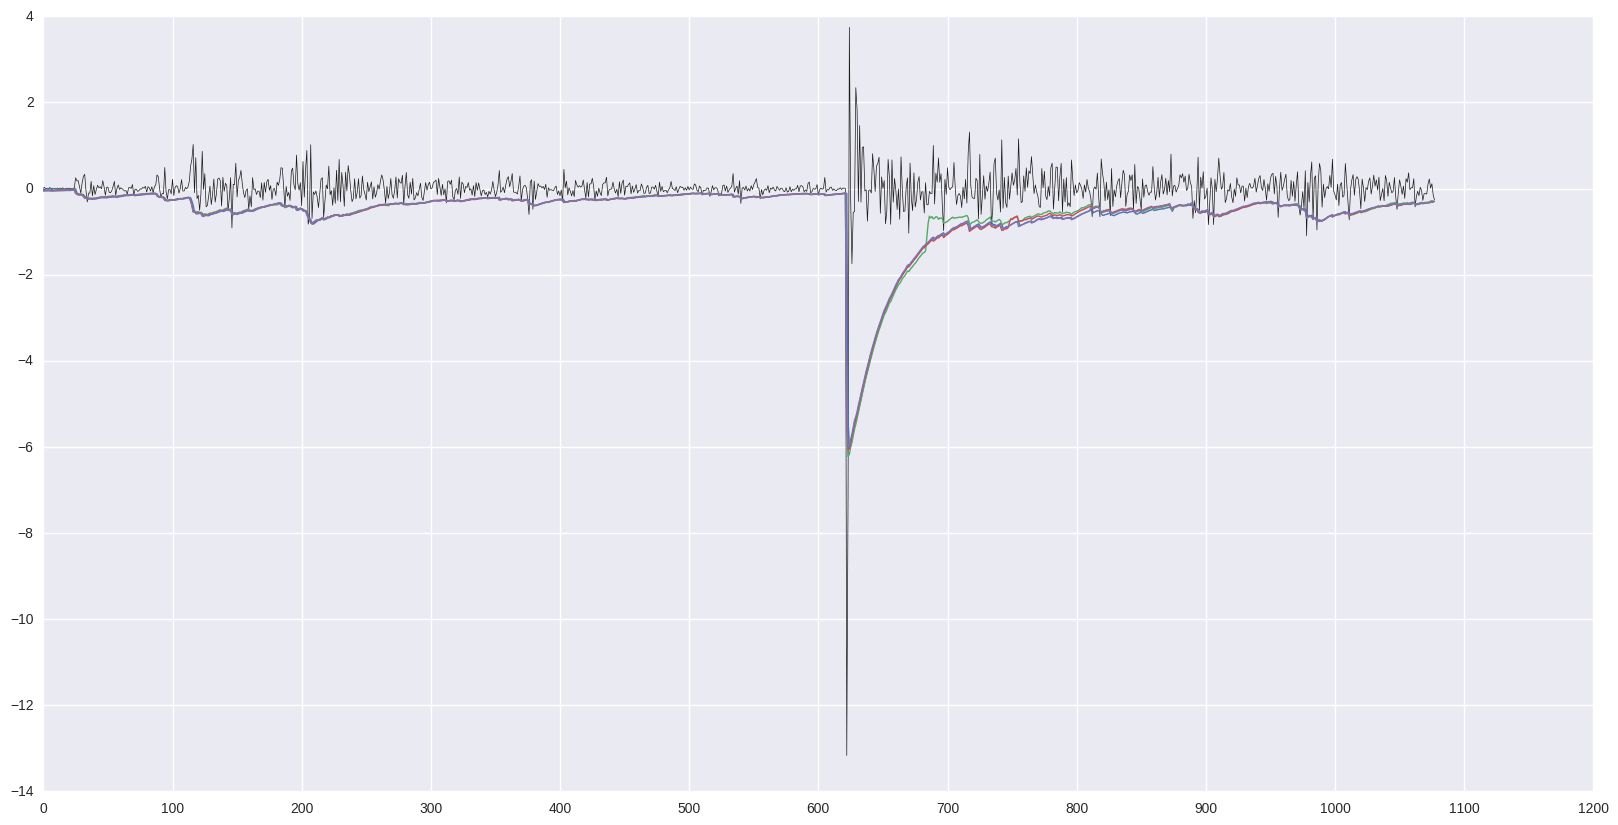

In [21]:

plt.figure(figsize=(20,10))
plt.plot(prices[d][a:].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['Riskmetrics'],linewidth=1.)
plt.plot(data1['Riskmetrics'][190::].reset_index(drop=True),linewidth=1.)
plt.plot(data2['Riskmetrics'][127::].reset_index(drop=True),linewidth=1.)
plt.plot(data3['Riskmetrics'][64::].reset_index(drop=True),linewidth=1.)

#plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

In [22]:


# Compute number of violation

risk_metrics_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['Riskmetrics'][i * 100 +j]:
            _sum += 1
    risk_metrics_violation.append(_sum)    
        

In [23]:
risk_metrics_violation

[9, 3, 2, 5, 3, 5, 3, 1, 5, 8]

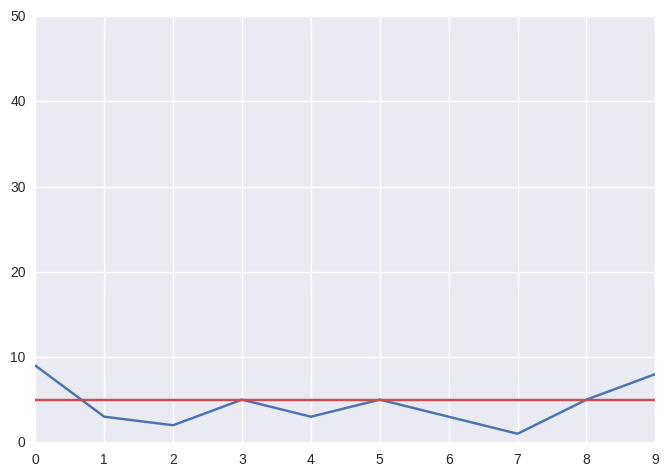

In [24]:
plt.ylim([0, 50])

plt.plot(risk_metrics_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 0

In [25]:
a

253

In [26]:
len(prices) - a

1078

([<matplotlib.axis.XTick at 0x7f3998ff2c10>,
 <a list of 13 Text xticklabel objects>)

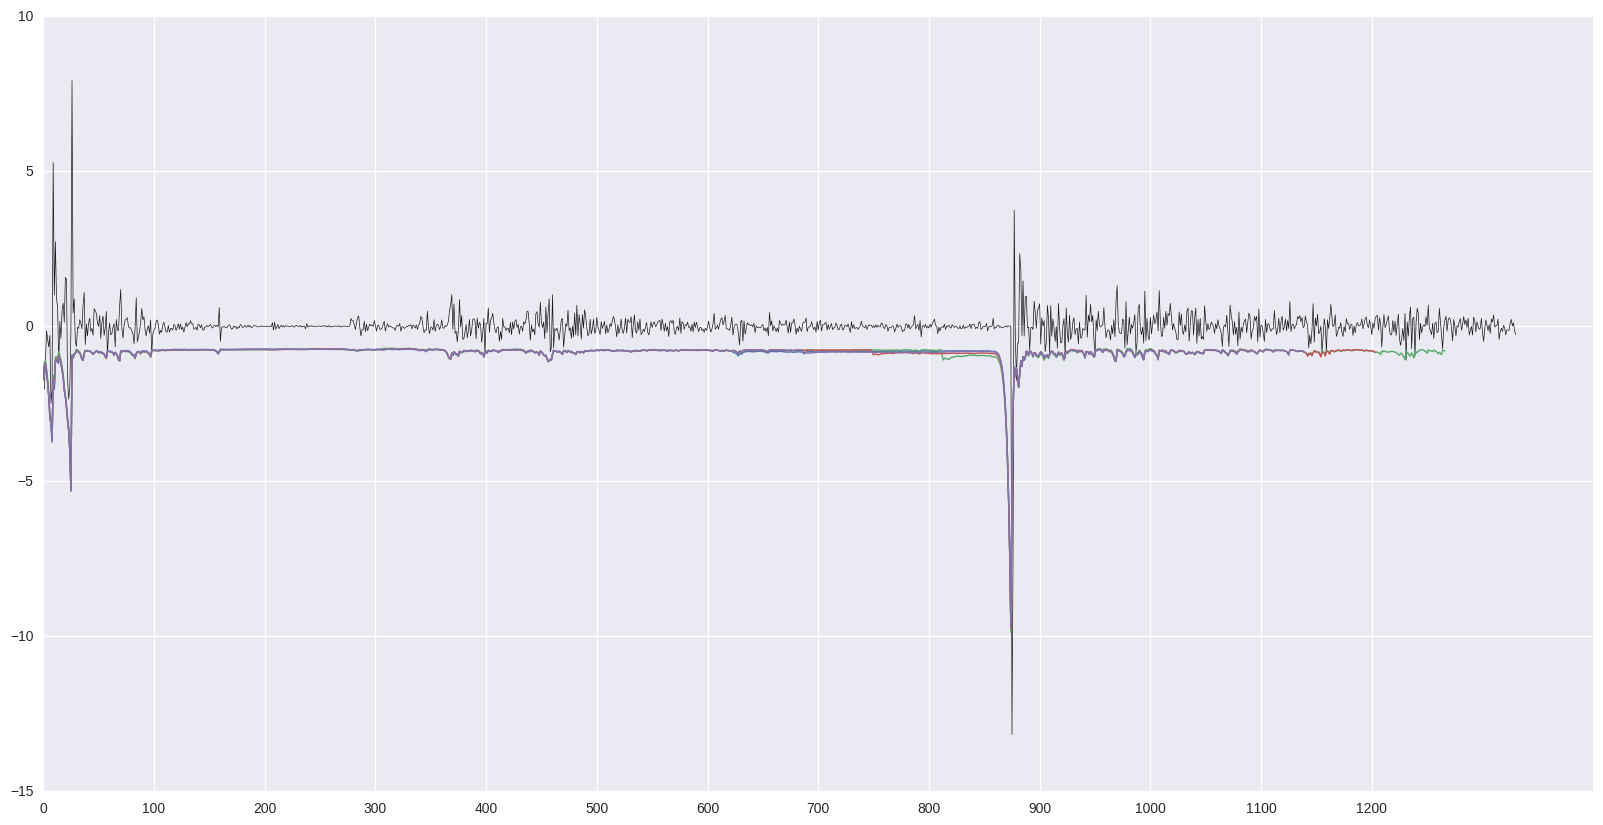

In [29]:
plt.figure(figsize=(20,10))
plt.plot(prices[d].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['GARCH'],linewidth=1.)
plt.plot(data1['GARCH'].reset_index(drop=True),linewidth=1.)
plt.plot(data2['GARCH'].reset_index(drop=True),linewidth=1.)
plt.plot(data3['GARCH'].reset_index(drop=True),linewidth=1.)

#plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

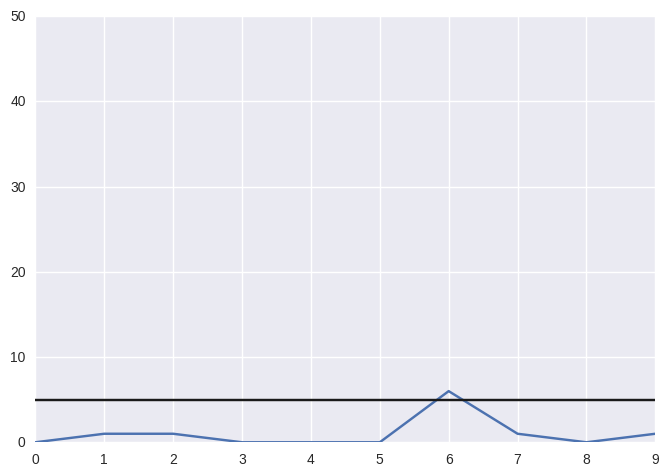

In [32]:

# Compute number of violation

garch_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['GARCH'][i * 100 +j]:
            _sum += 1
    garch_violation.append(_sum)  
    
plt.ylim([0, 50])

#plt.plot(risk_metrics_violation)
plt.plot(garch_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'k') # count 4   

([<matplotlib.axis.XTick at 0x7fdf009b9390>,
 <a list of 13 Text xticklabel objects>)

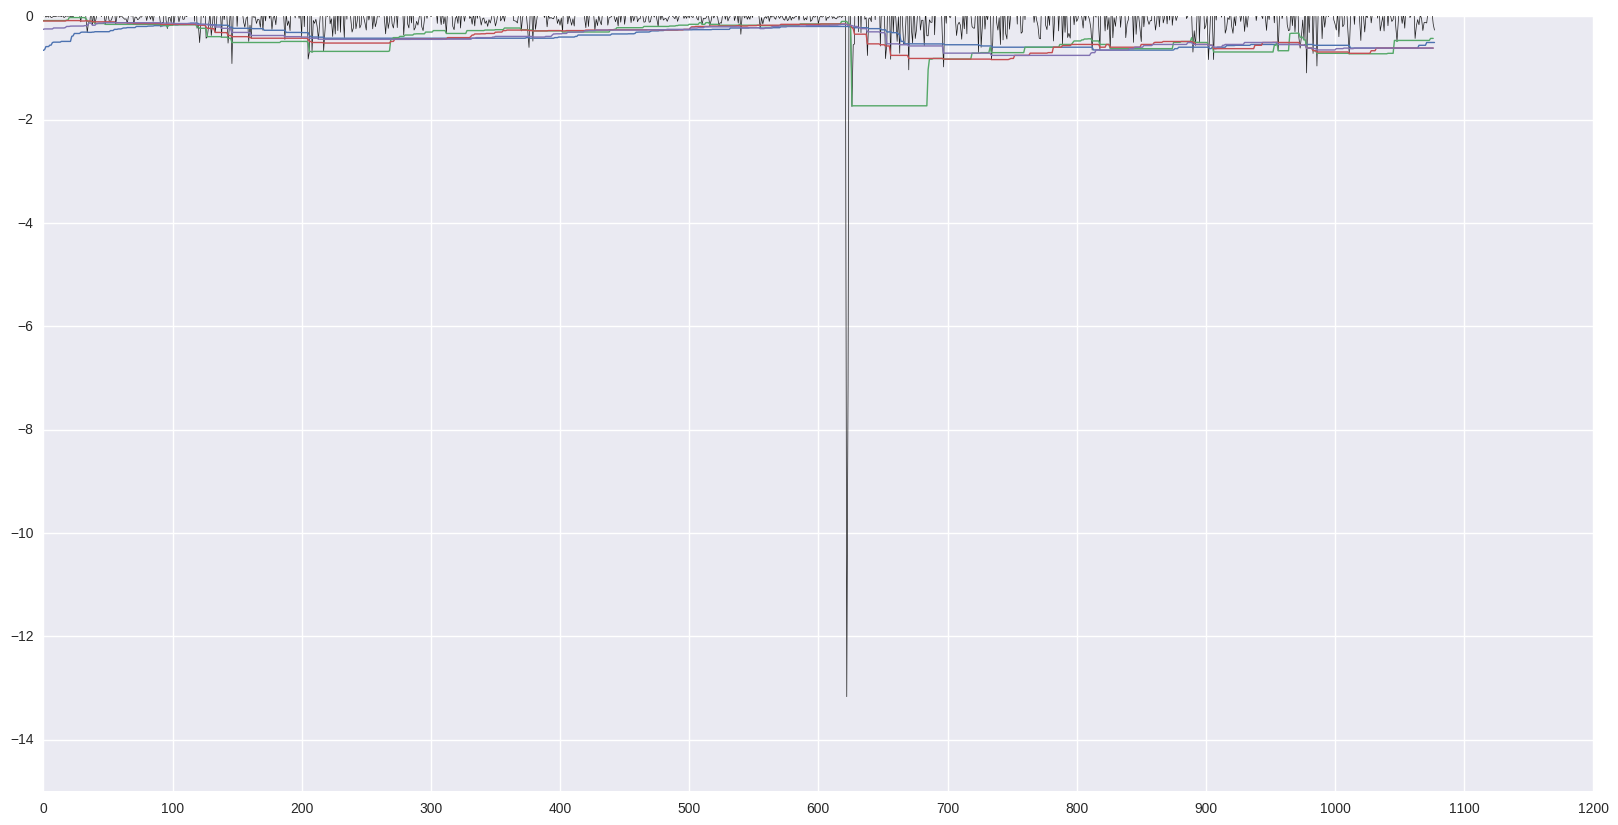

In [33]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a::].reset_index(drop=True),linewidth=.5, color='k')
plt.plot(data['HistSimul'],linewidth=1.)
plt.plot(data1['HistSimul'][190::].reset_index(drop=True),linewidth=1.)
plt.plot(data2['HistSimul'][127::].reset_index(drop=True),linewidth=1.)
plt.plot(data3['HistSimul'][64::].reset_index(drop=True),linewidth=1.)

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

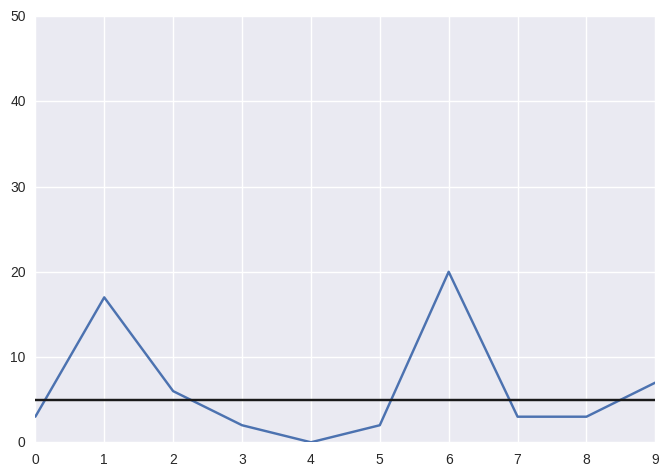

In [34]:
# Compute number of violation

hs_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['HistSimul'][i * 100 +j]:
            _sum += 1
    hs_violation.append(_sum)  
    
plt.ylim([0, 50])

#plt.plot(risk_metrics_violation)
#plt.plot(garch_violation)
plt.plot(hs_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'k') # count 6

([<matplotlib.axis.XTick at 0x7fdefee95490>,
 <a list of 13 Text xticklabel objects>)

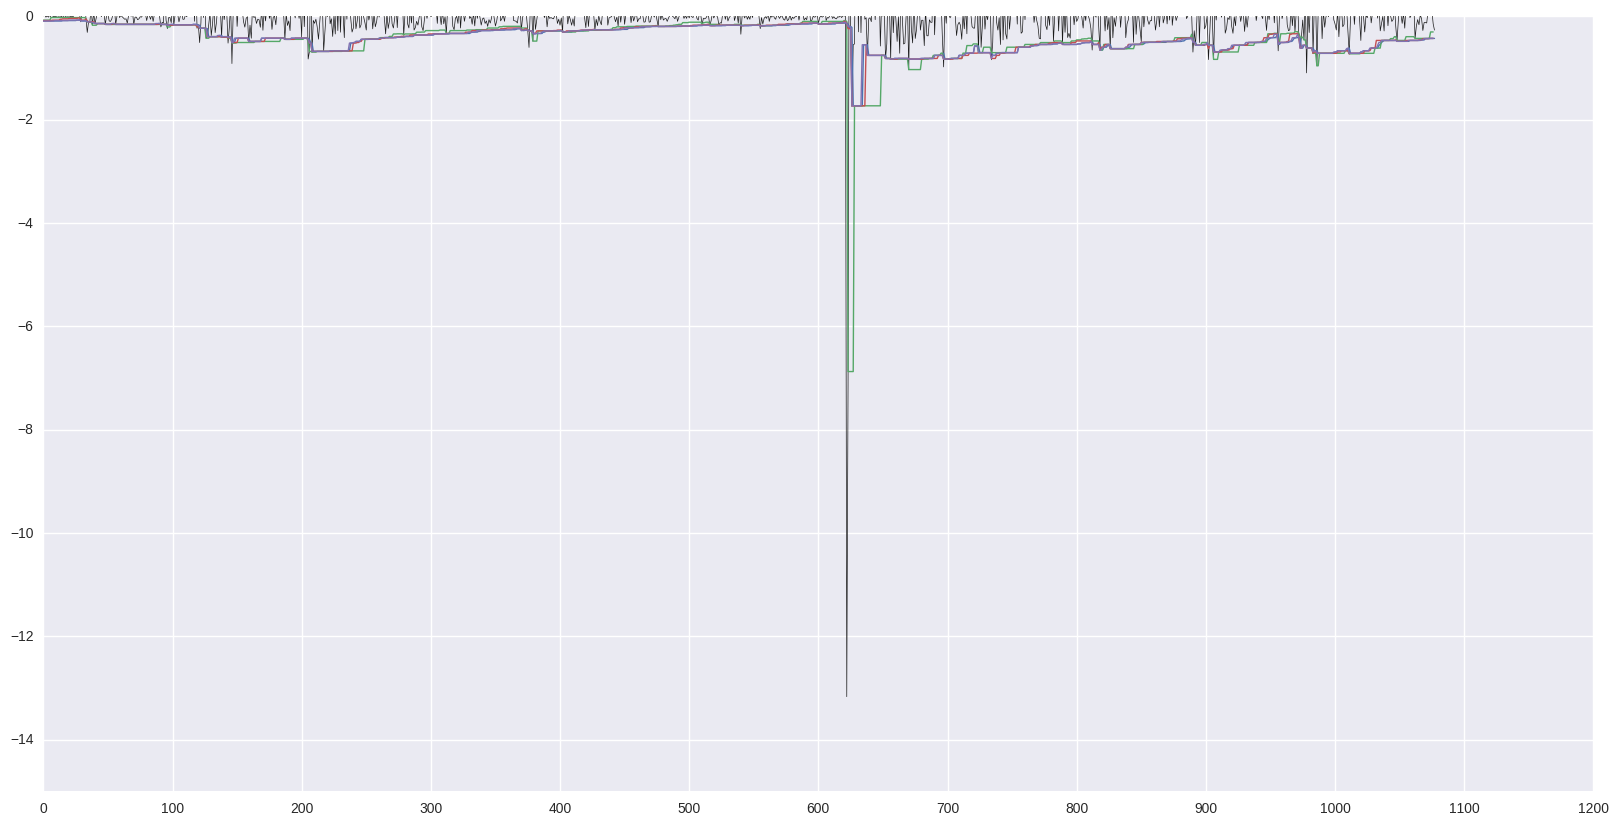

In [35]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a::].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['HistSimulWght'],linewidth=1.)
plt.plot(data1['HistSimulWght'][190::].reset_index(drop=True),linewidth=1.)
plt.plot(data2['HistSimulWght'][127::].reset_index(drop=True),linewidth=1.)
plt.plot(data3['HistSimulWght'][64::].reset_index(drop=True),linewidth=1.)

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

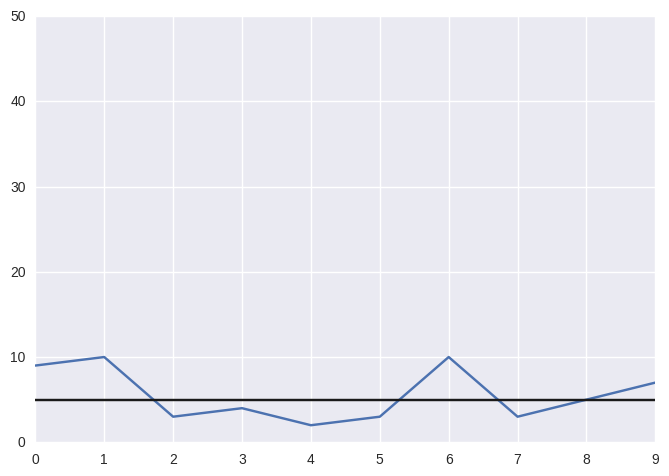

In [36]:
# Compute number of violation

hs_time_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['HistSimulWght'][i * 100 +j]:
            _sum += 1
    hs_time_violation.append(_sum)  
    
plt.ylim([0, 50])

#plt.plot(risk_metrics_violation)
#plt.plot(garch_violation)
#plt.plot(hs_violation)
plt.plot(hs_time_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'k') # count 6

([<matplotlib.axis.XTick at 0x7fdf00a2b210>,
 <a list of 13 Text xticklabel objects>)

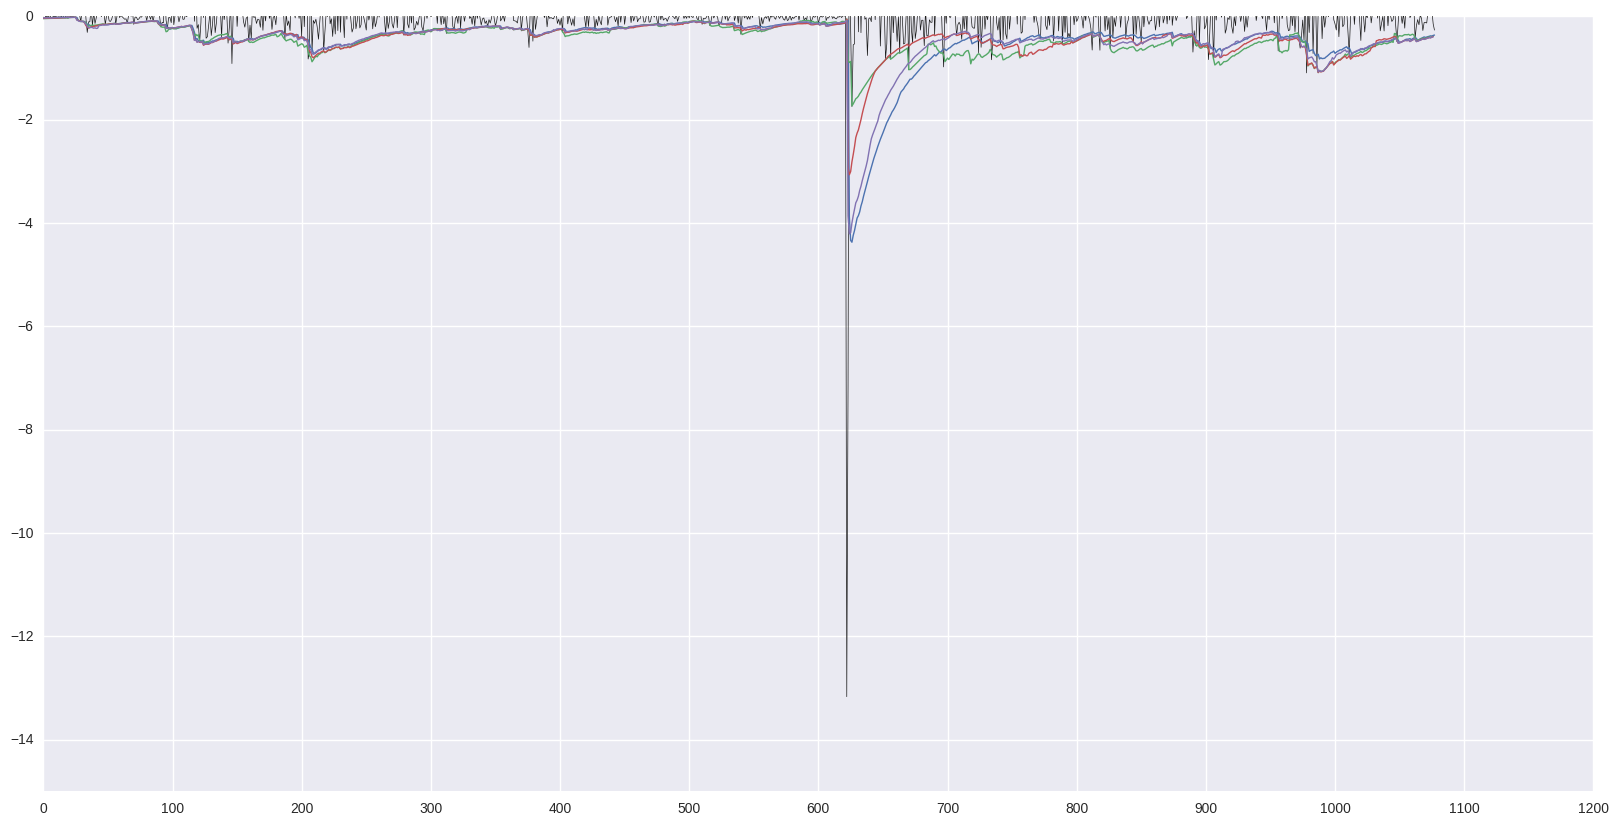

In [37]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a::].reset_index(drop=True),linewidth=.5, color='k')
plt.plot(data['HistSimulVolWght'],linewidth=1.)
plt.plot(data1['HistSimulVolWght'][190::].reset_index(drop=True),linewidth=1.)
plt.plot(data2['HistSimulVolWght'][127::].reset_index(drop=True),linewidth=1.)
plt.plot(data3['HistSimulVolWght'][64::].reset_index(drop=True),linewidth=1.)

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

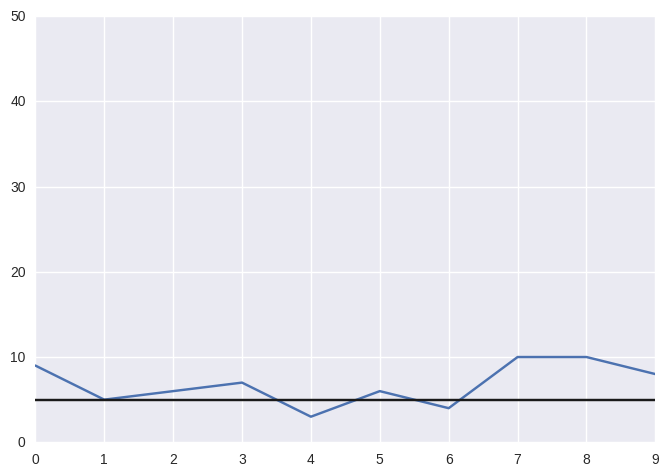

In [38]:
# Compute number of violation

hs_vol_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['HistSimulVolWght'][i * 100 +j]:
            _sum += 1
    hs_vol_violation.append(_sum)  
    
plt.ylim([0, 50])

#plt.plot(risk_metrics_violation)
#plt.plot(garch_violation)
#plt.plot(hs_violation)
#plt.plot(hs_time_violation)
plt.plot(hs_vol_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'k') # count 3

([<matplotlib.axis.XTick at 0x7fdeff010090>,
 <a list of 13 Text xticklabel objects>)

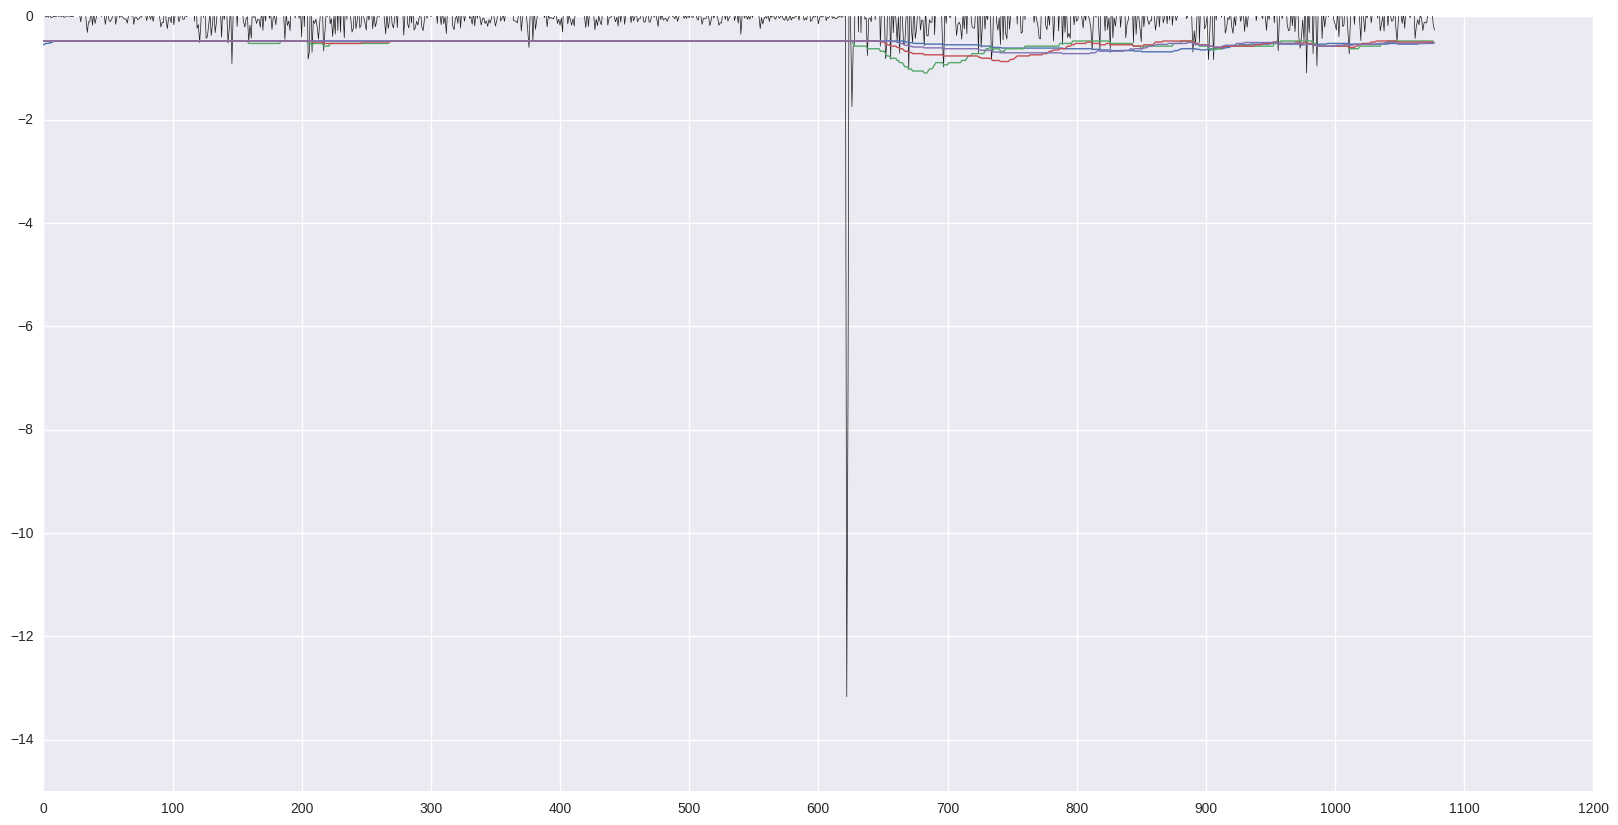

In [39]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a::].reset_index(drop=True),linewidth=.5, color='k')
plt.plot(data['POTPareto'],linewidth=1.)
plt.plot(data1['POTPareto'][190::].reset_index(drop=True),linewidth=1.)
plt.plot(data2['POTPareto'][127::].reset_index(drop=True),linewidth=1.)
plt.plot(data3['POTPareto'][64::].reset_index(drop=True),linewidth=1.)

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

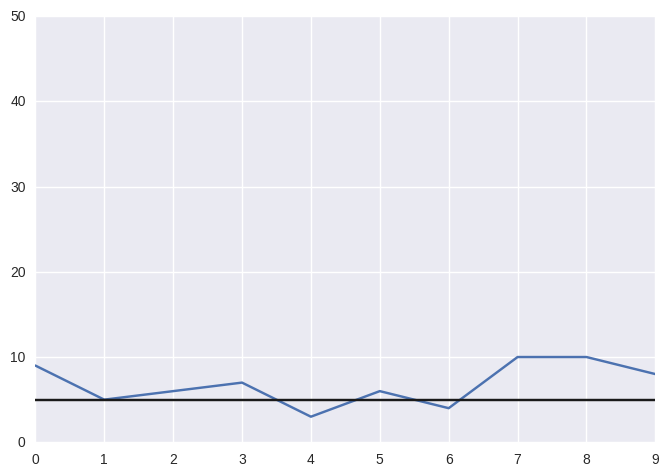

In [40]:
# Compute number of violation

pot_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['HistSimulVolWght'][i * 100 +j]:
            _sum += 1
    pot_violation.append(_sum)  
    
plt.ylim([0, 50])

#plt.plot(risk_metrics_violation)
#plt.plot(garch_violation)
#plt.plot(hs_violation)
#plt.plot(hs_time_violation)
#plt.plot(hs_vol_violation)
plt.plot(pot_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'k') # count 3

In [41]:
data = pd.read_csv('../data/var_risk_metrics_DKKEUR_252.csv')
b = 'DKKEUR' # 'CHFEUR' 'DKKEUR' 'CZKEUR' 'BRLUSD'
c = -2e-01
d = b + 'LogRtn'
prices[d] = (np.log(prices[b].shift(1)) - np.log(prices[b])) * 100.

([<matplotlib.axis.XTick at 0x7fdeff23c090>,
 <a list of 13 Text xticklabel objects>)

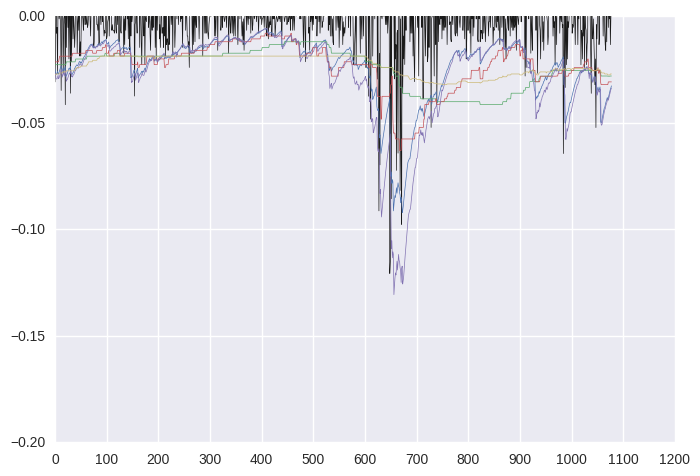

In [42]:
plt.plot(prices[d][a:].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['Riskmetrics'],linewidth=.5)
#plt.plot(data['GARCH'],linewidth=.5)
plt.plot(data['HistSimul'],linewidth=.5)
plt.plot(data['HistSimulWght'],linewidth=.5)
plt.plot(data['HistSimulVolWght'],linewidth=.5)
plt.plot(data['POTPareto'],linewidth=.5)

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

([<matplotlib.axis.XTick at 0x7fdeff9c6b50>,
 <a list of 13 Text xticklabel objects>)

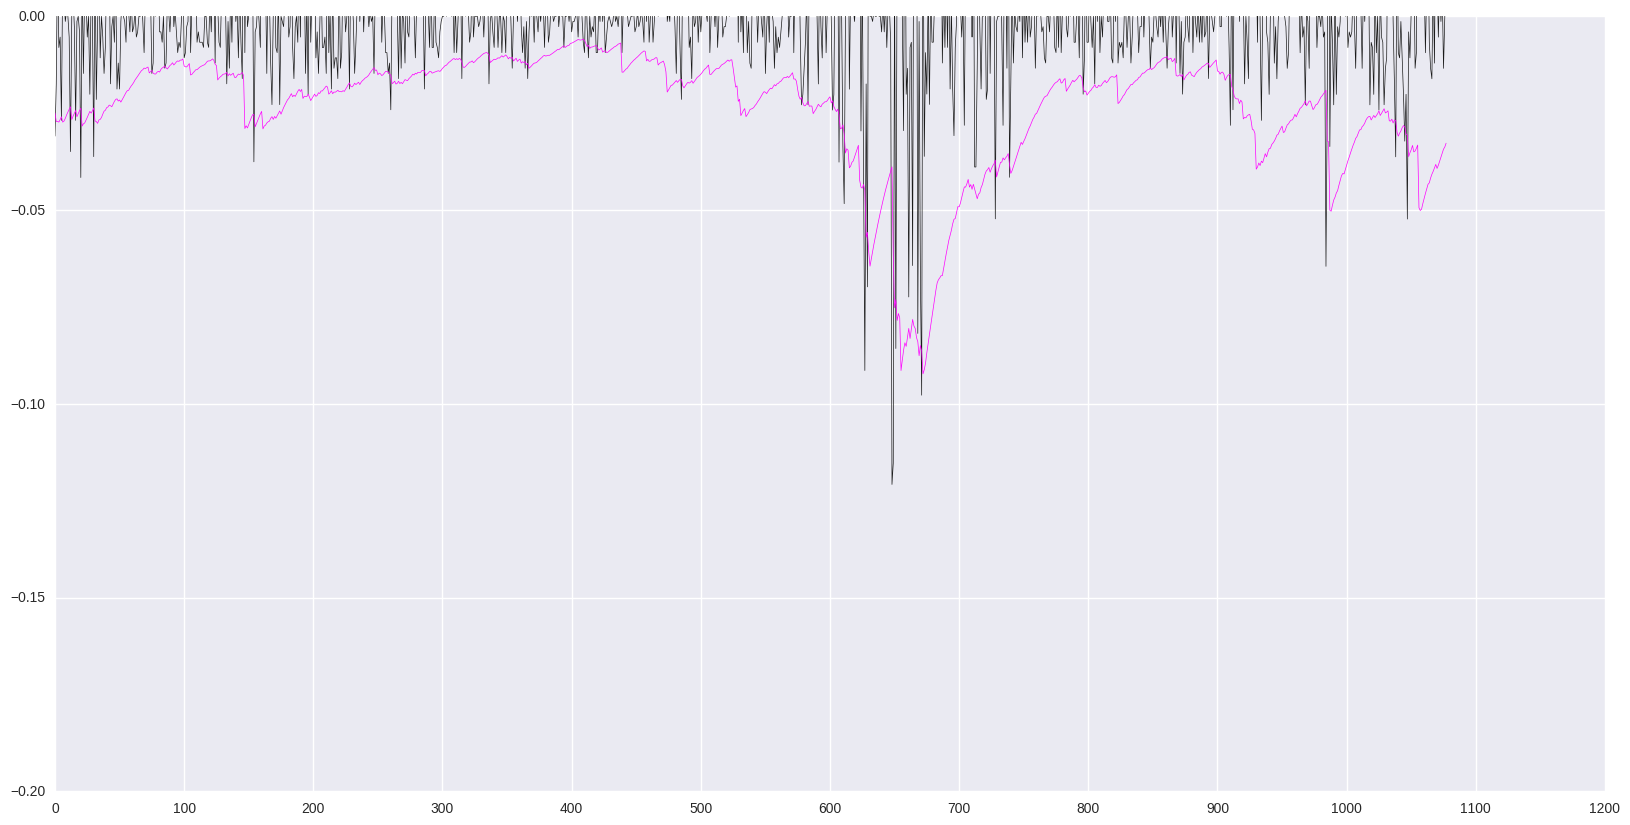

In [43]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a:].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['Riskmetrics'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

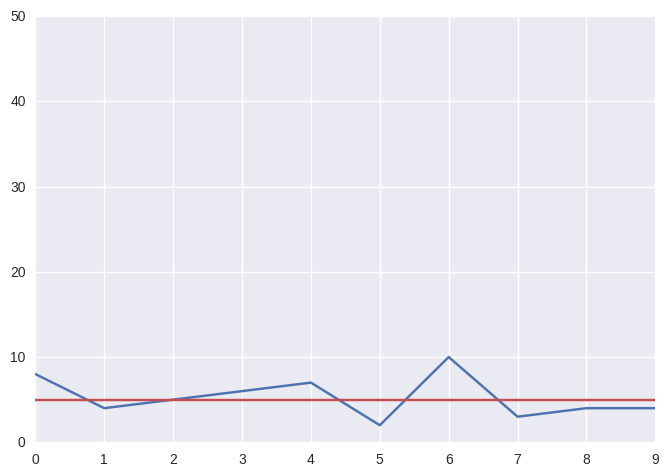

In [44]:
# Compute number of violation

risk_metrics_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['Riskmetrics'][i * 100 +j]:
            _sum += 1
    risk_metrics_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(risk_metrics_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 1

([<matplotlib.axis.XTick at 0x7fdeff7ef510>,
 <a list of 13 Text xticklabel objects>)

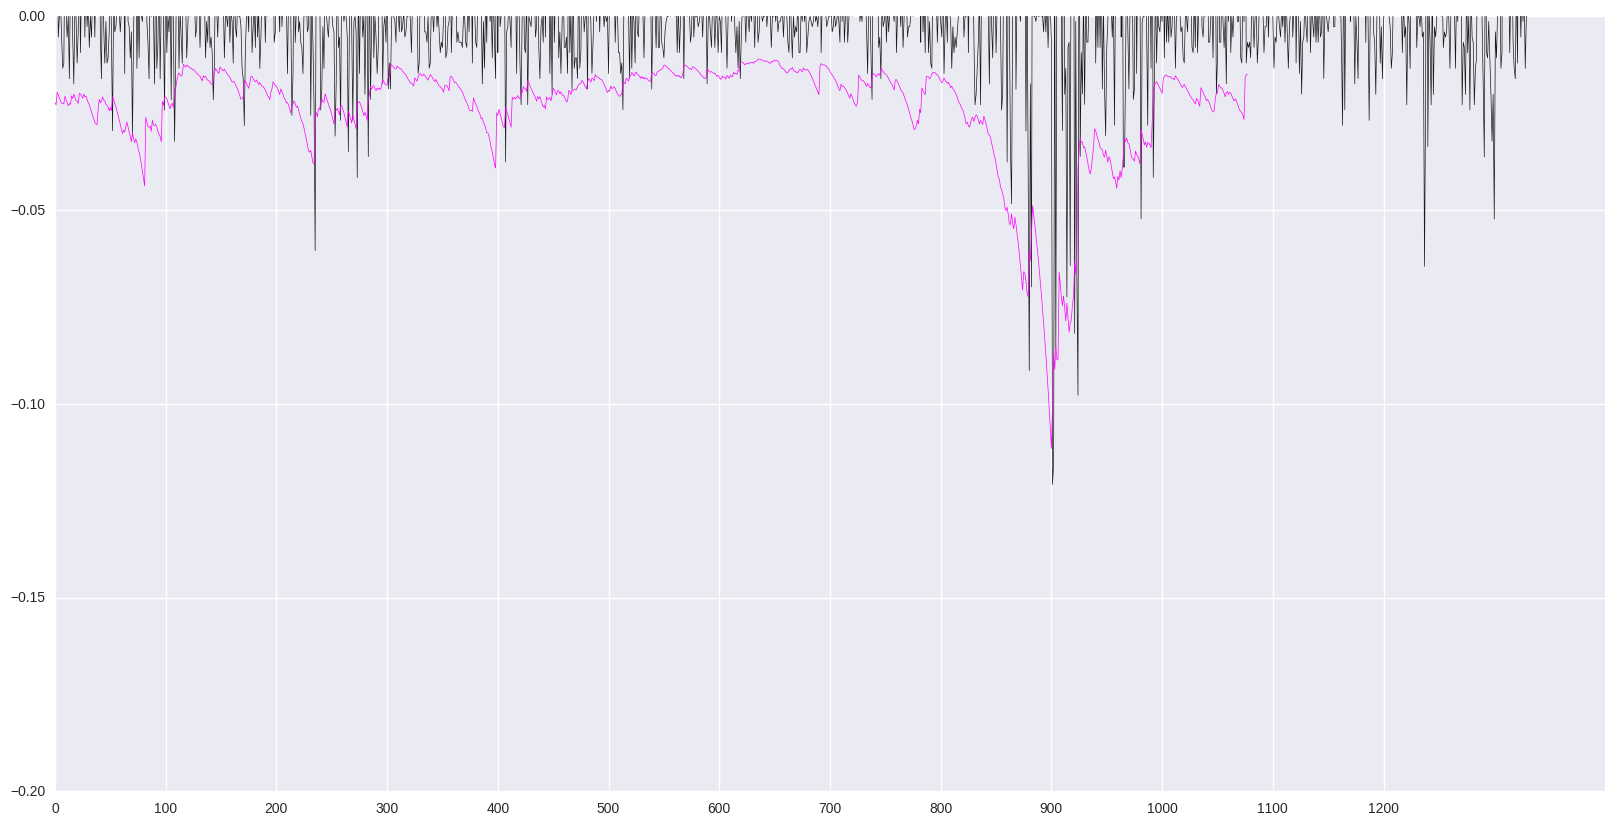

In [45]:
plt.figure(figsize=(20,10))
plt.plot(prices[d].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['GARCH'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

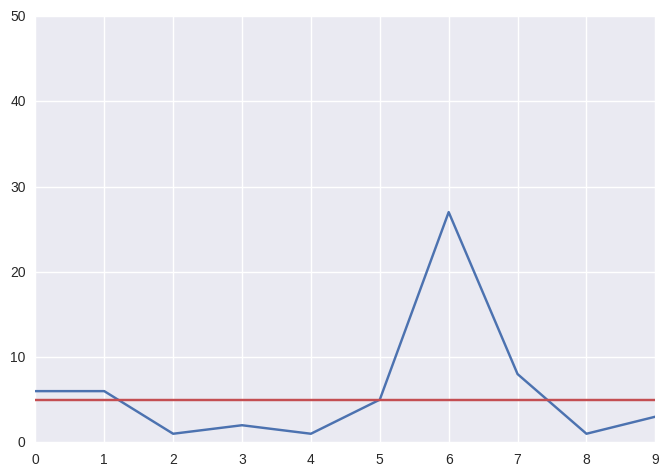

In [46]:
# Compute number of violation

garch_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['GARCH'][i * 100 +j]:
            _sum += 1
    garch_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(garch_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 0

([<matplotlib.axis.XTick at 0x7fdeff6b64d0>,
 <a list of 13 Text xticklabel objects>)

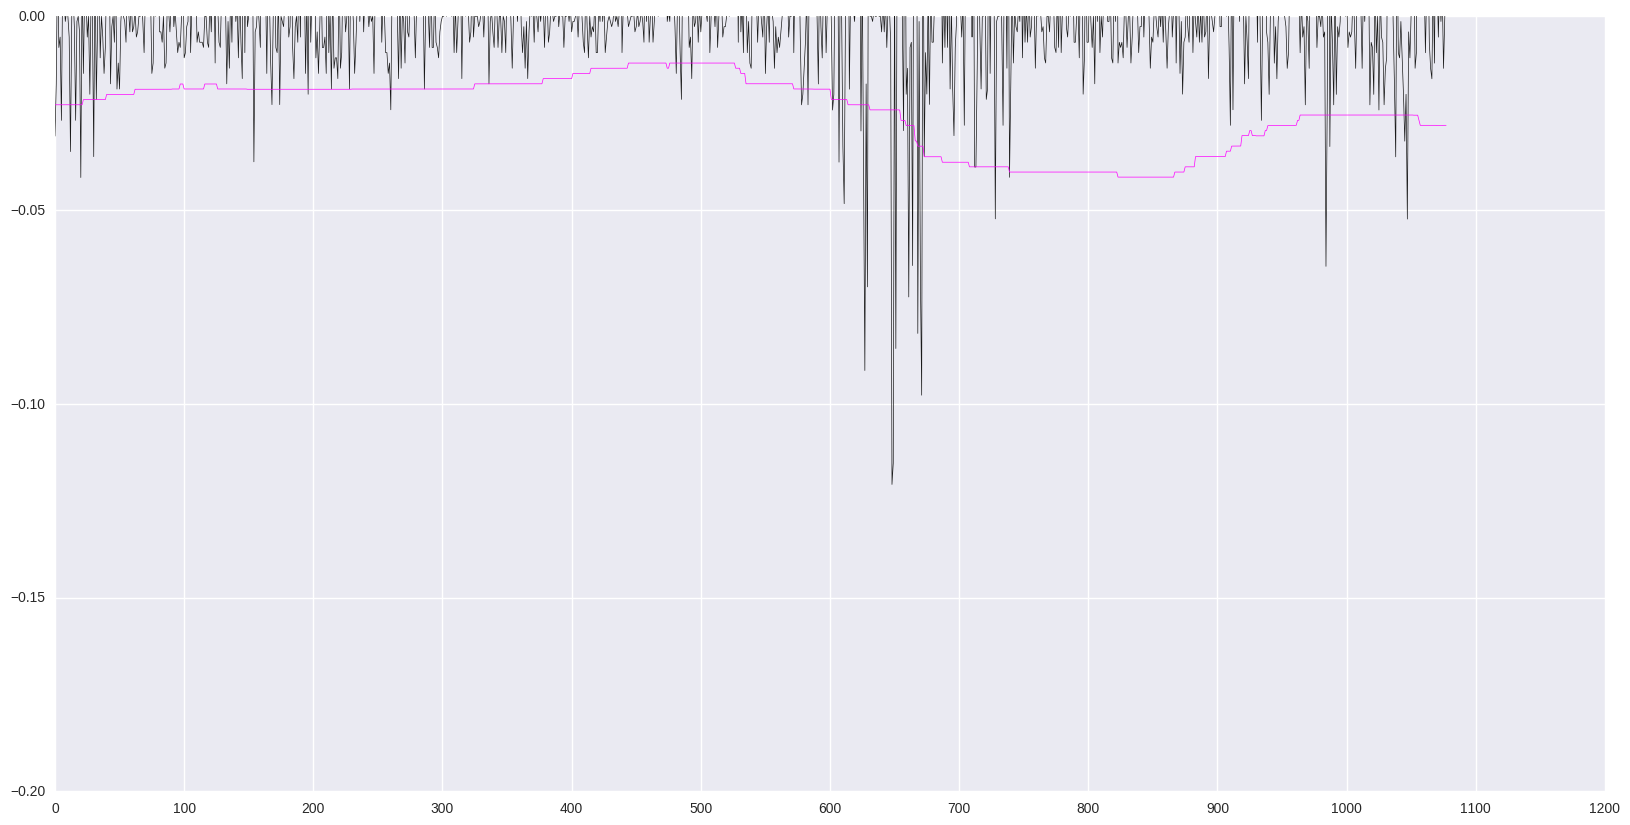

In [47]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a::].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['HistSimul'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

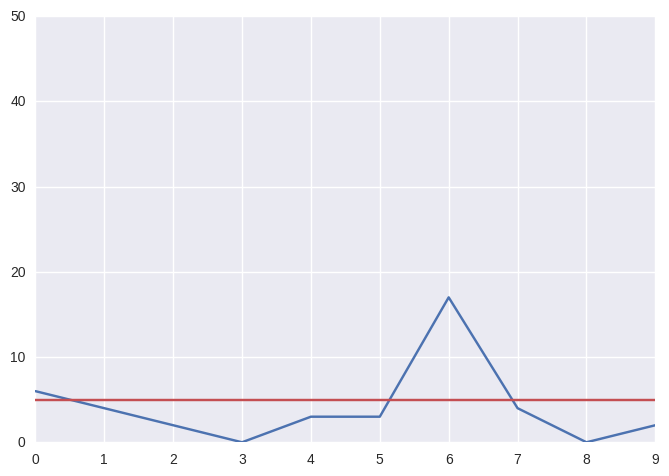

In [49]:
# Compute number of violation

hs_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['HistSimul'][i * 100 +j]:
            _sum += 1
    hs_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(hs_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 8

([<matplotlib.axis.XTick at 0x7fdeff4f8ad0>,
 <a list of 13 Text xticklabel objects>)

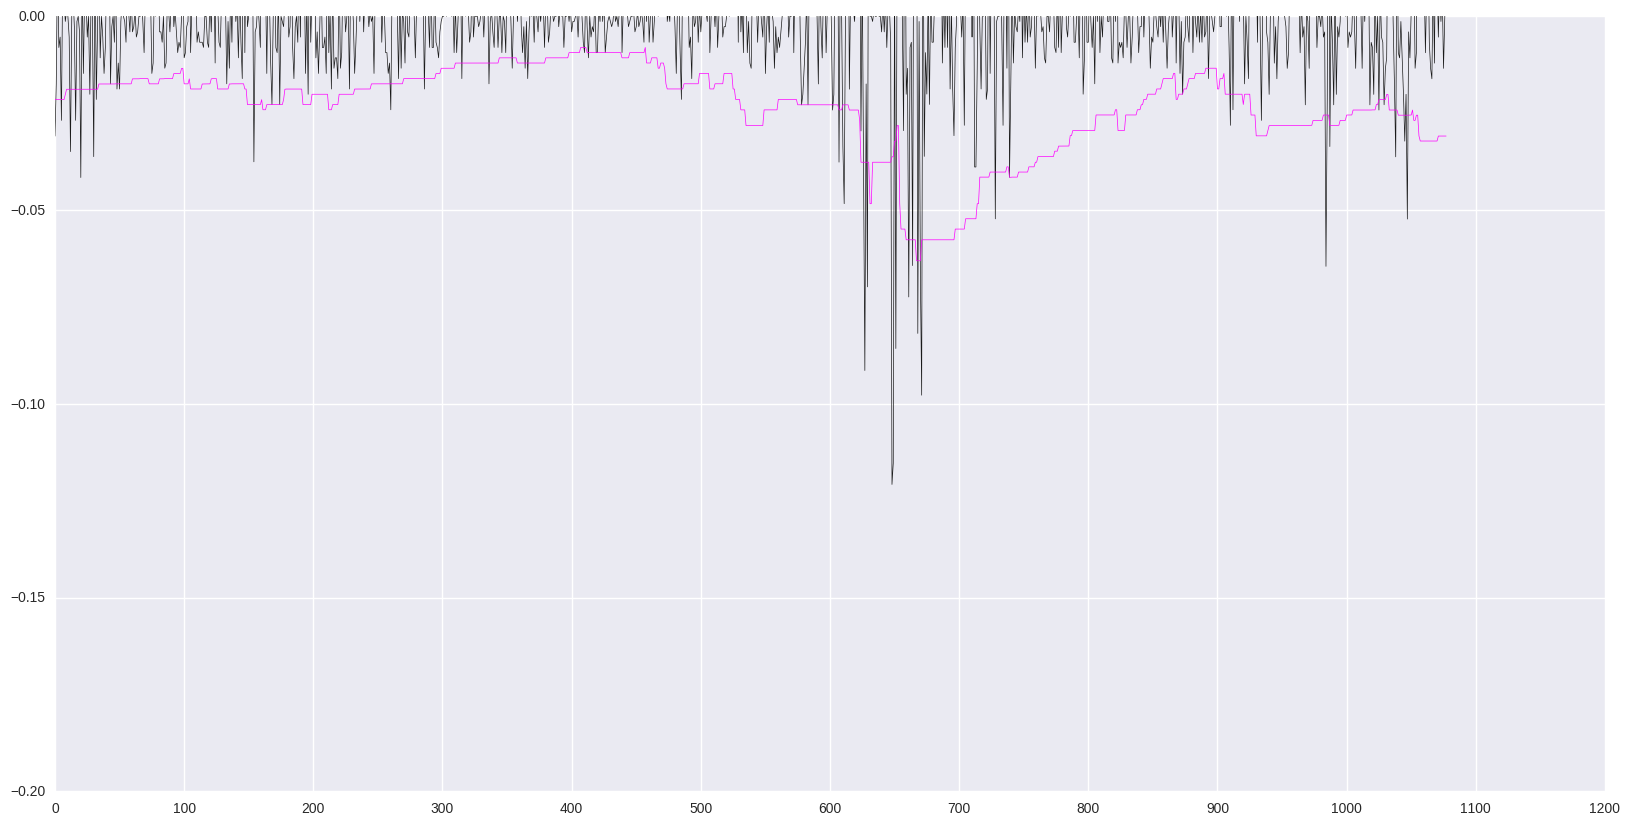

In [50]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a::].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['HistSimulWght'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

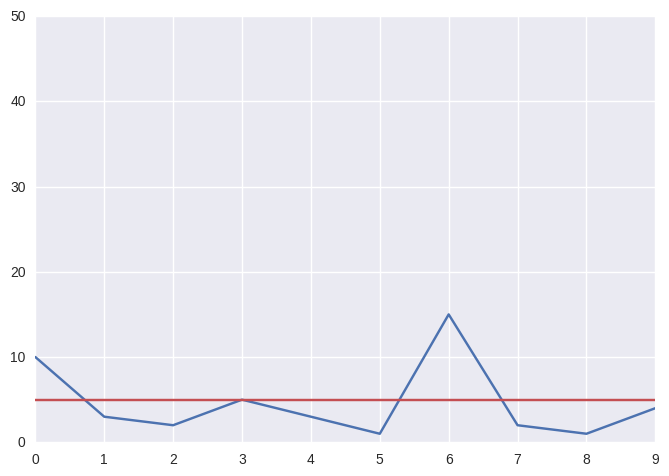

In [51]:
# Compute number of violation

hs_time_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['HistSimulWght'][i * 100 +j]:
            _sum += 1
    hs_time_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(hs_time_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 8

([<matplotlib.axis.XTick at 0x7fdeff6f2150>,
 <a list of 13 Text xticklabel objects>)

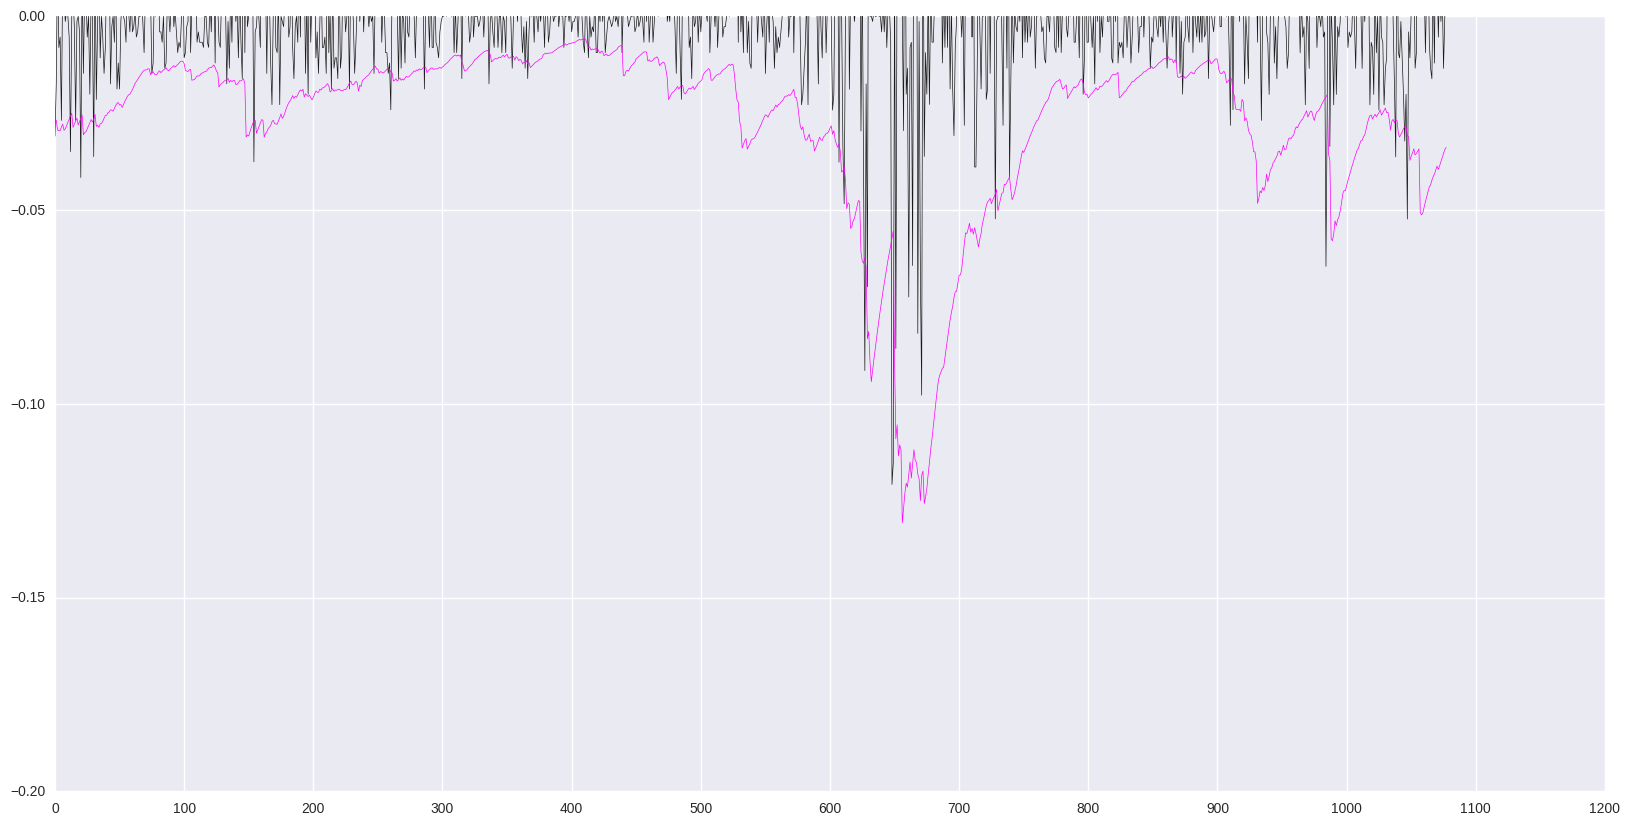

In [52]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a::].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['HistSimulVolWght'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

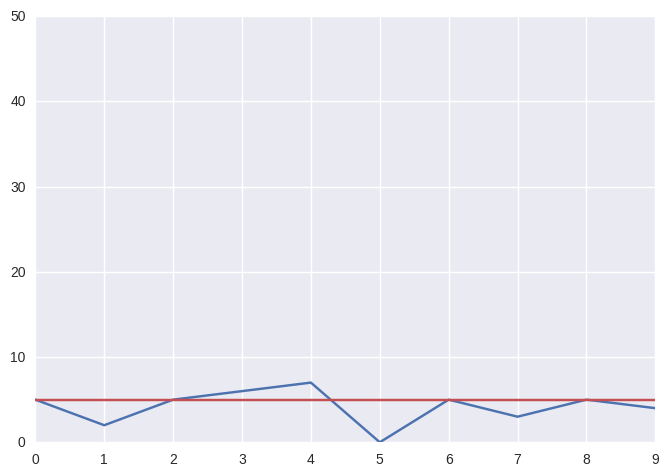

In [53]:
# Compute number of violation

hs_vol_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['HistSimulVolWght'][i * 100 +j]:
            _sum += 1
    hs_vol_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(hs_vol_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 7

([<matplotlib.axis.XTick at 0x7fdefe79aa10>,
 <a list of 13 Text xticklabel objects>)

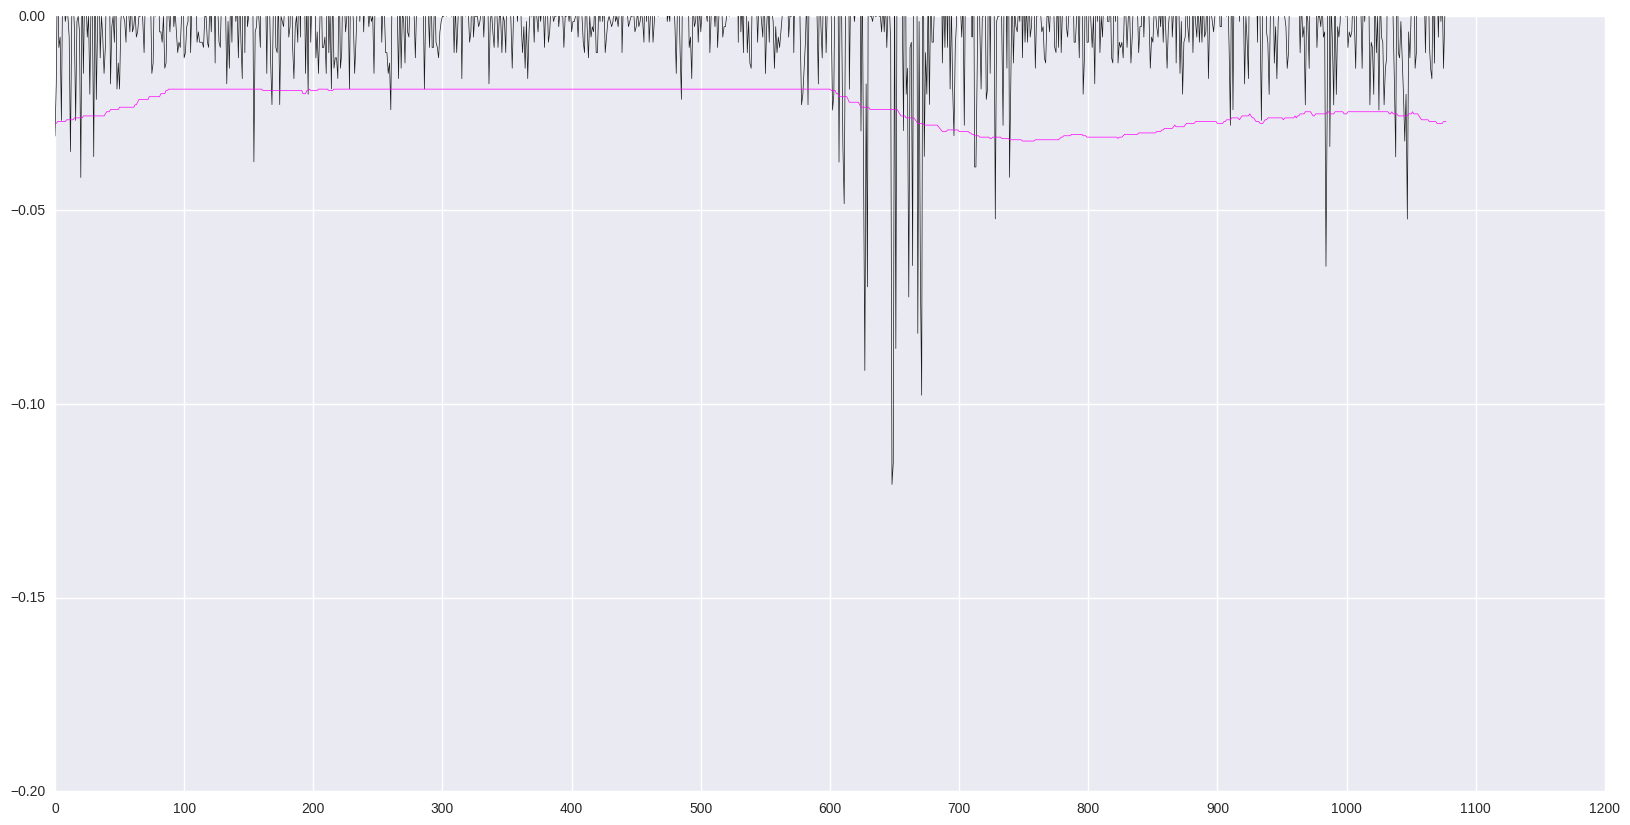

In [54]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a::].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['POTPareto'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

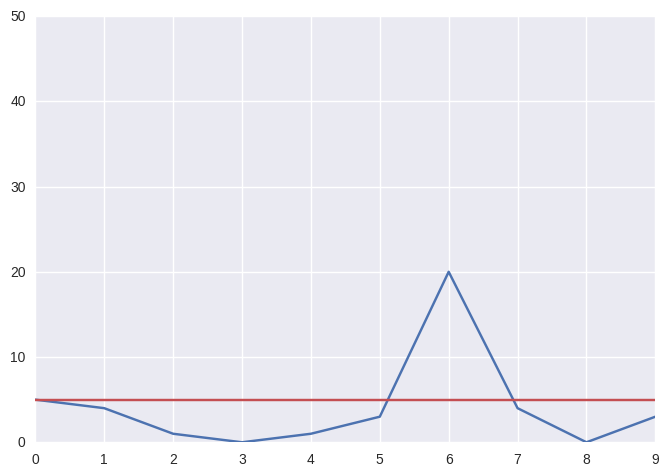

In [55]:
# Compute number of violation

pot_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['POTPareto'][i * 100 +j]:
            _sum += 1
    pot_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(pot_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 7

In [56]:
data = pd.read_csv('../data/var_risk_metrics_CZKEUR_252.csv')
b = 'CZKEUR' # 'CHFEUR' 'DKKEUR' 'CZKEUR' 'BRLUSD'
c = -5.e-0
d = b + 'LogRtn'
prices[d] = (np.log(prices[b].shift(1)) - np.log(prices[b])) * 100.

([<matplotlib.axis.XTick at 0x7fdefe59f510>,
 <a list of 13 Text xticklabel objects>)

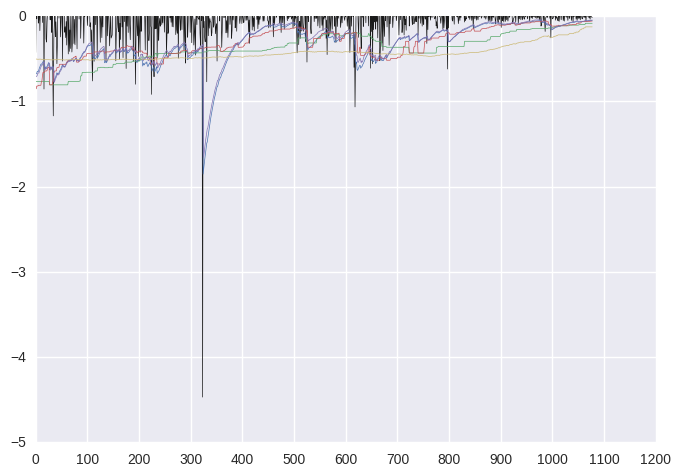

In [57]:
plt.plot(prices[d][a:].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['Riskmetrics'],linewidth=.5)
#plt.plot(data['GARCH'],linewidth=.5)
plt.plot(data['HistSimul'],linewidth=.5)
plt.plot(data['HistSimulWght'],linewidth=.5)
plt.plot(data['HistSimulVolWght'],linewidth=.5)
plt.plot(data['POTPareto'],linewidth=.5)

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

([<matplotlib.axis.XTick at 0x7fdefe694590>,
 <a list of 13 Text xticklabel objects>)

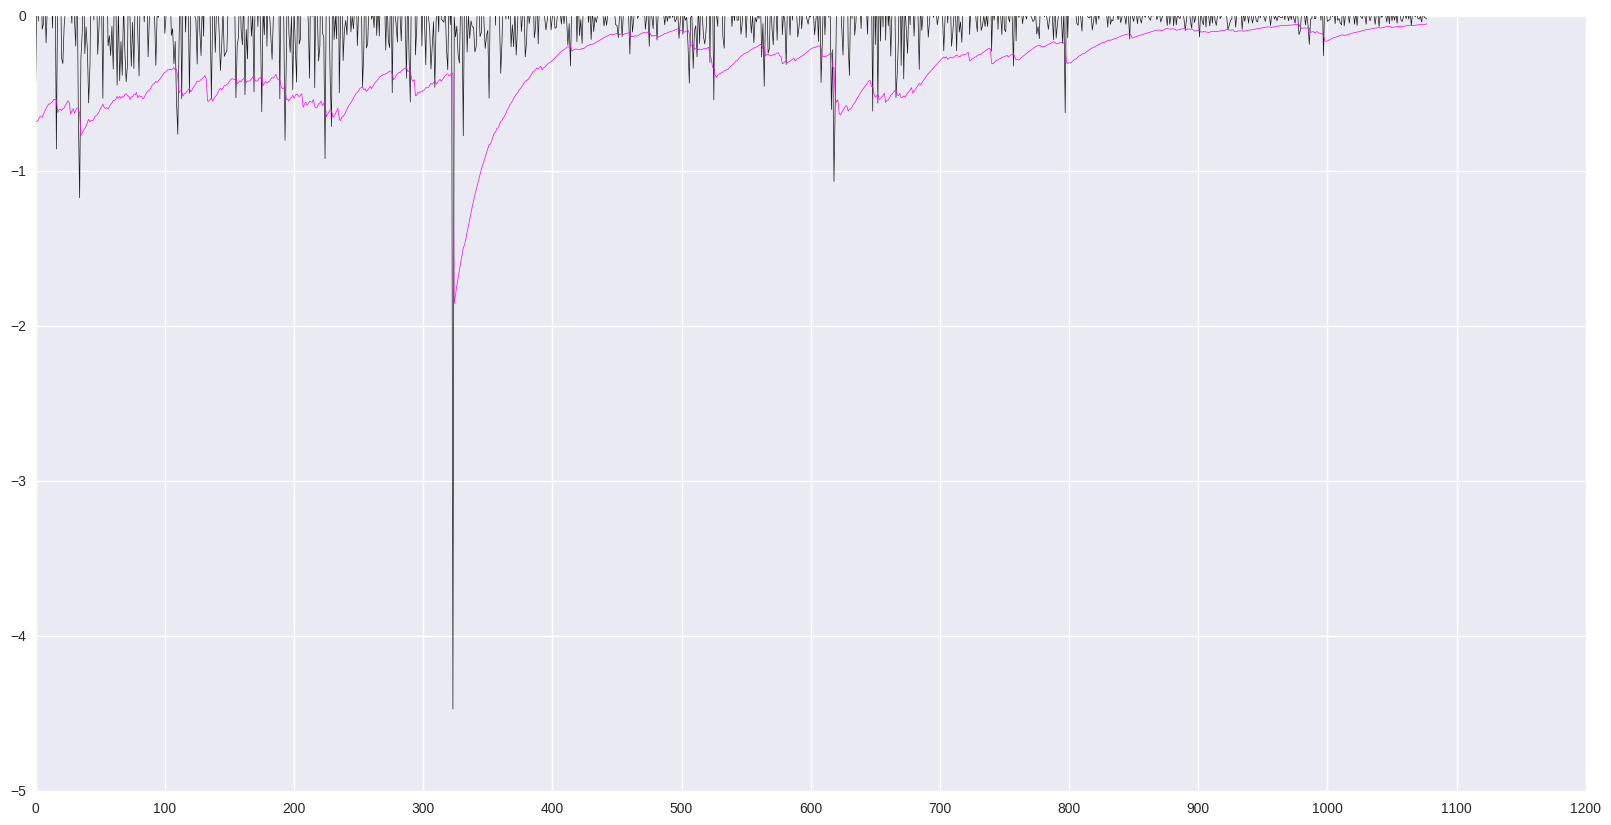

In [58]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a:].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['Riskmetrics'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

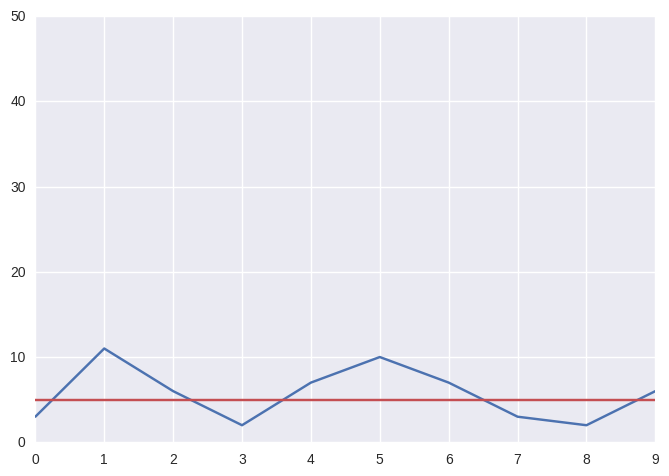

In [59]:
# Compute number of violation

risk_metrics_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['Riskmetrics'][i * 100 +j]:
            _sum += 1
    risk_metrics_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(risk_metrics_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 3

([<matplotlib.axis.XTick at 0x7fdefd37c890>,
 <a list of 13 Text xticklabel objects>)

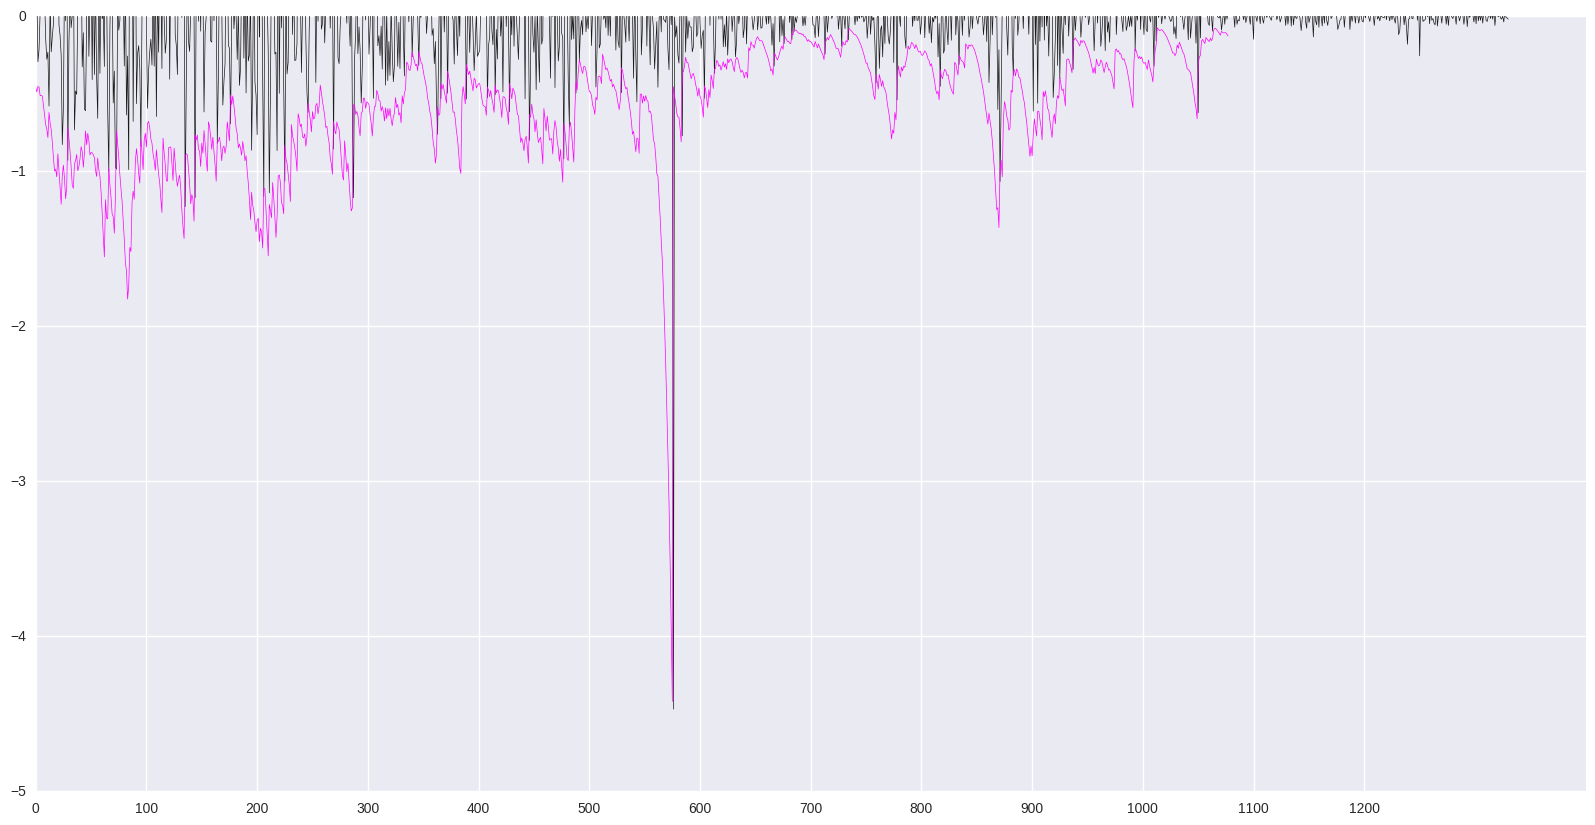

In [60]:
plt.figure(figsize=(20,10))
plt.plot(prices[d].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['GARCH'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

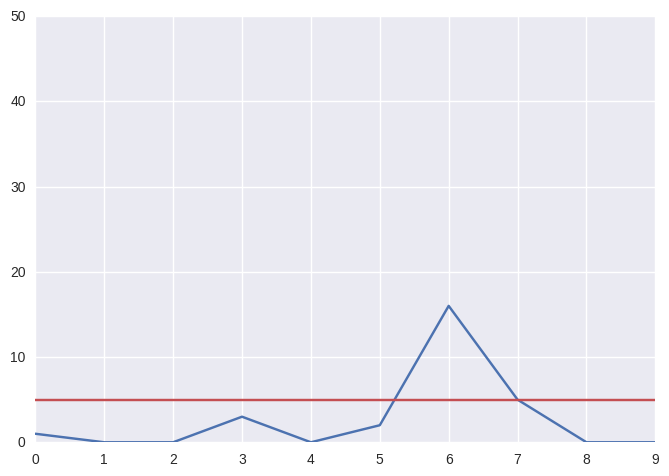

In [61]:
# Compute number of violation

garch_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['GARCH'][i * 100 +j]:
            _sum += 1
    garch_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(garch_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 1

([<matplotlib.axis.XTick at 0x7fdefd15e710>,
 <a list of 13 Text xticklabel objects>)

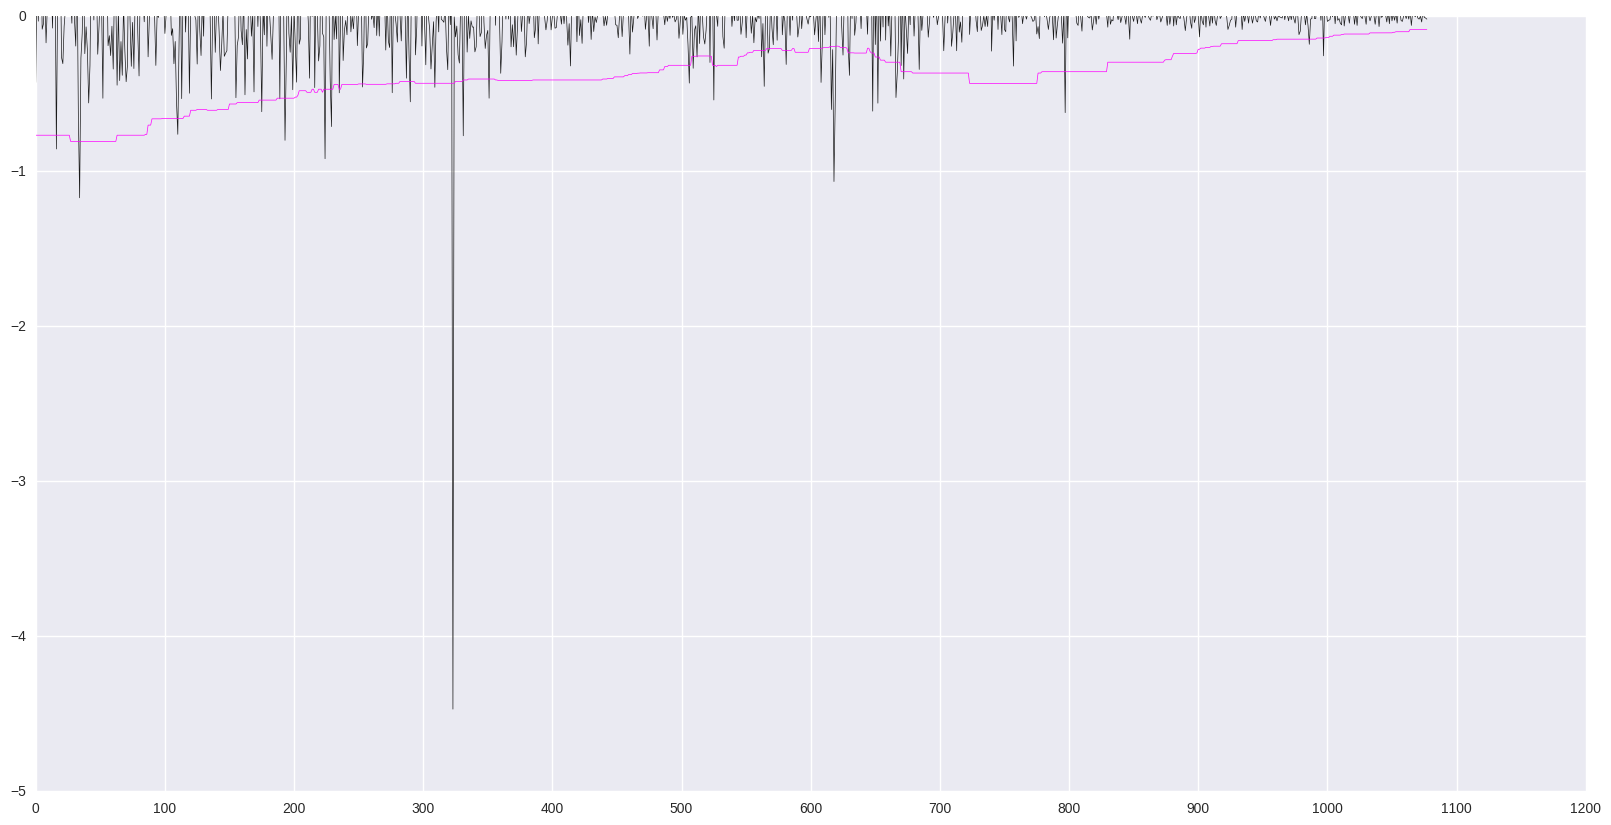

In [62]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a:].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['HistSimul'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

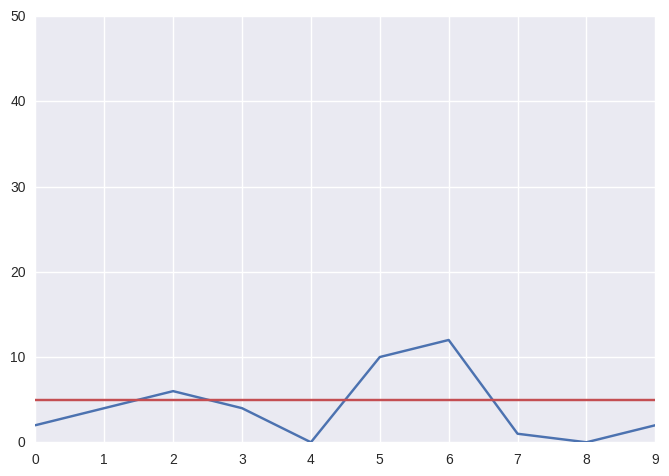

In [63]:
# Compute number of violation

hs_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['HistSimul'][i * 100 +j]:
            _sum += 1
    hs_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(hs_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 7

([<matplotlib.axis.XTick at 0x7fdefd0f0fd0>,
 <a list of 13 Text xticklabel objects>)

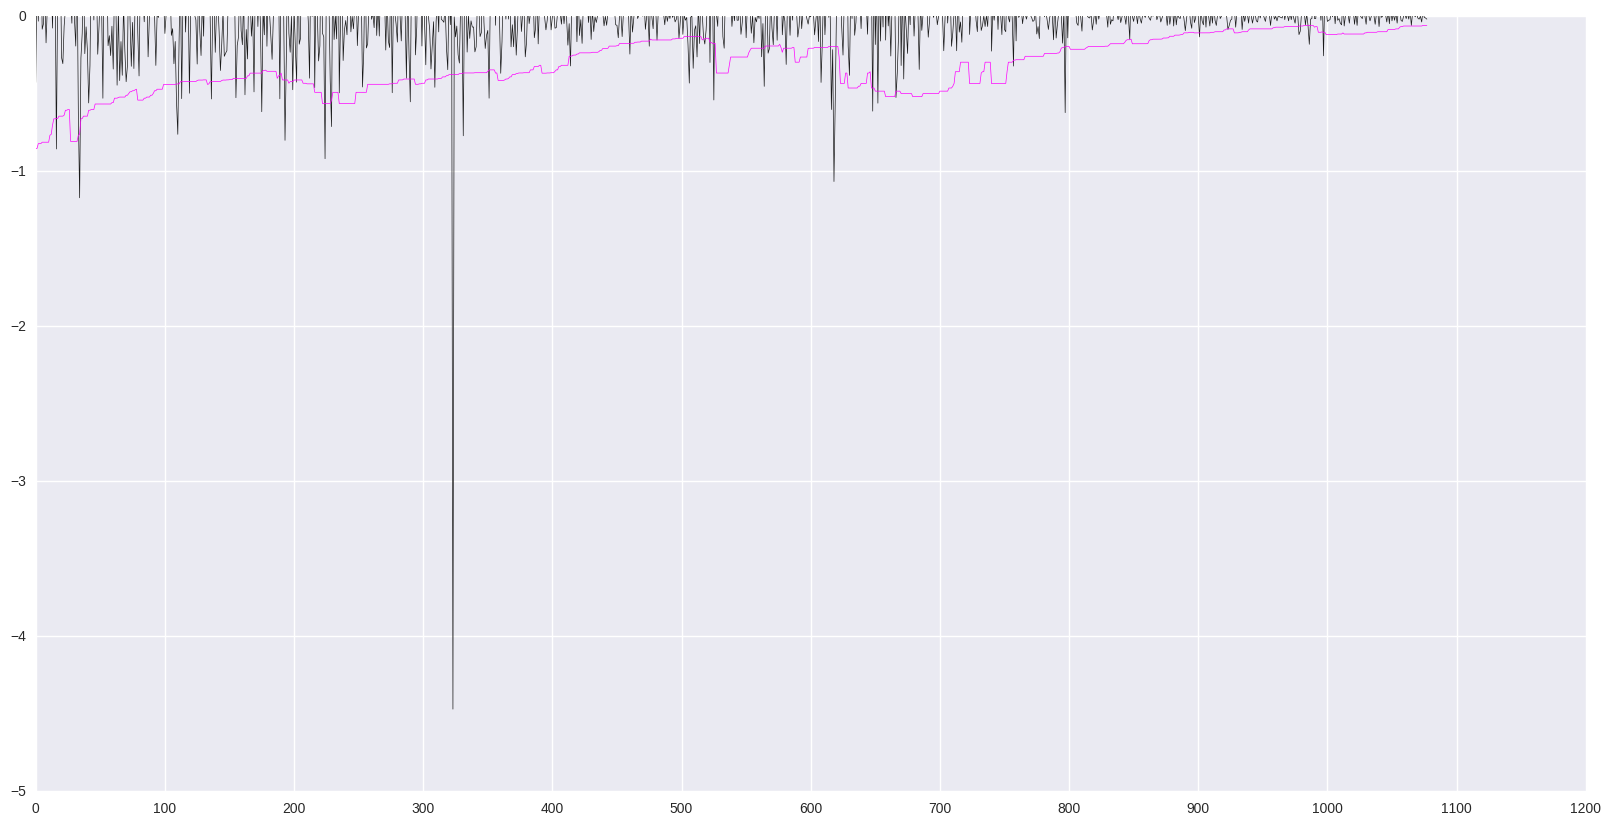

In [64]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a:].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['HistSimulWght'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

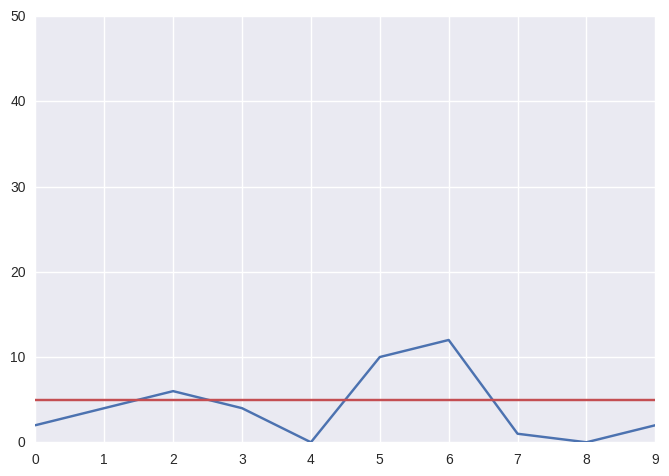

In [65]:
# Compute number of violation

hs_time_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['HistSimul'][i * 100 +j]:
            _sum += 1
    hs_time_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(hs_time_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 7

([<matplotlib.axis.XTick at 0x7fdefd0e39d0>,
 <a list of 13 Text xticklabel objects>)

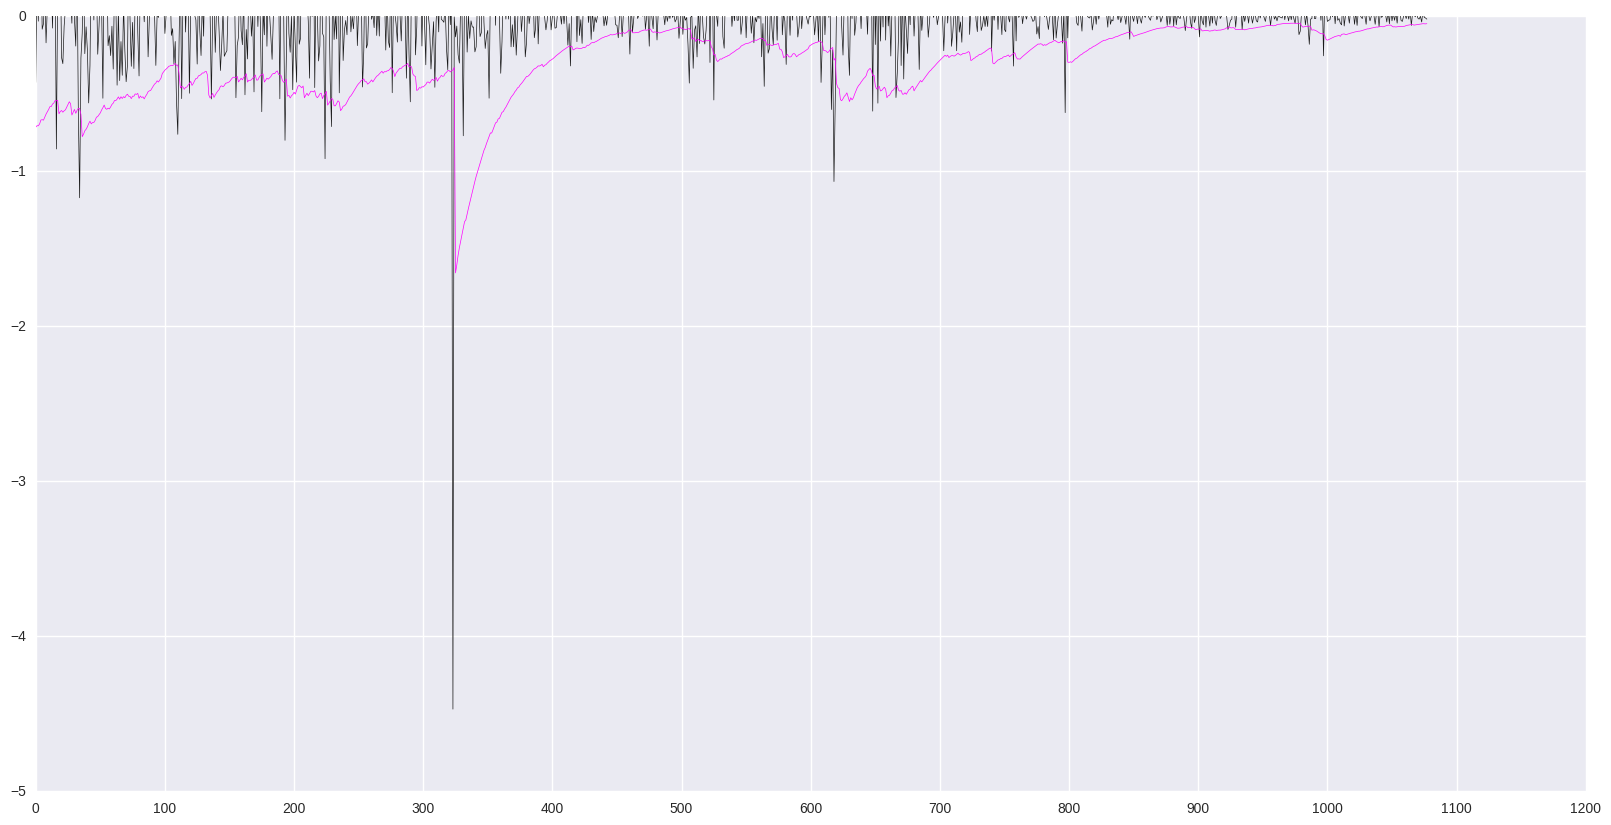

In [66]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a:].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['HistSimulVolWght'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

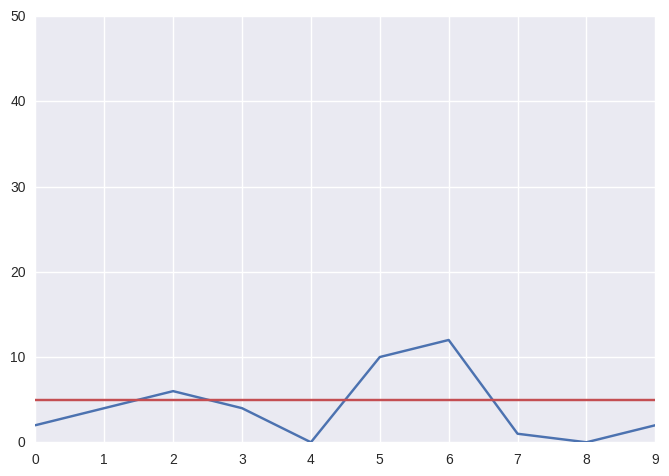

In [67]:
# Compute number of violation

hs_vol_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['HistSimul'][i * 100 +j]:
            _sum += 1
    hs_vol_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(hs_vol_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 7

([<matplotlib.axis.XTick at 0x7fdefd151d10>,
 <a list of 13 Text xticklabel objects>)

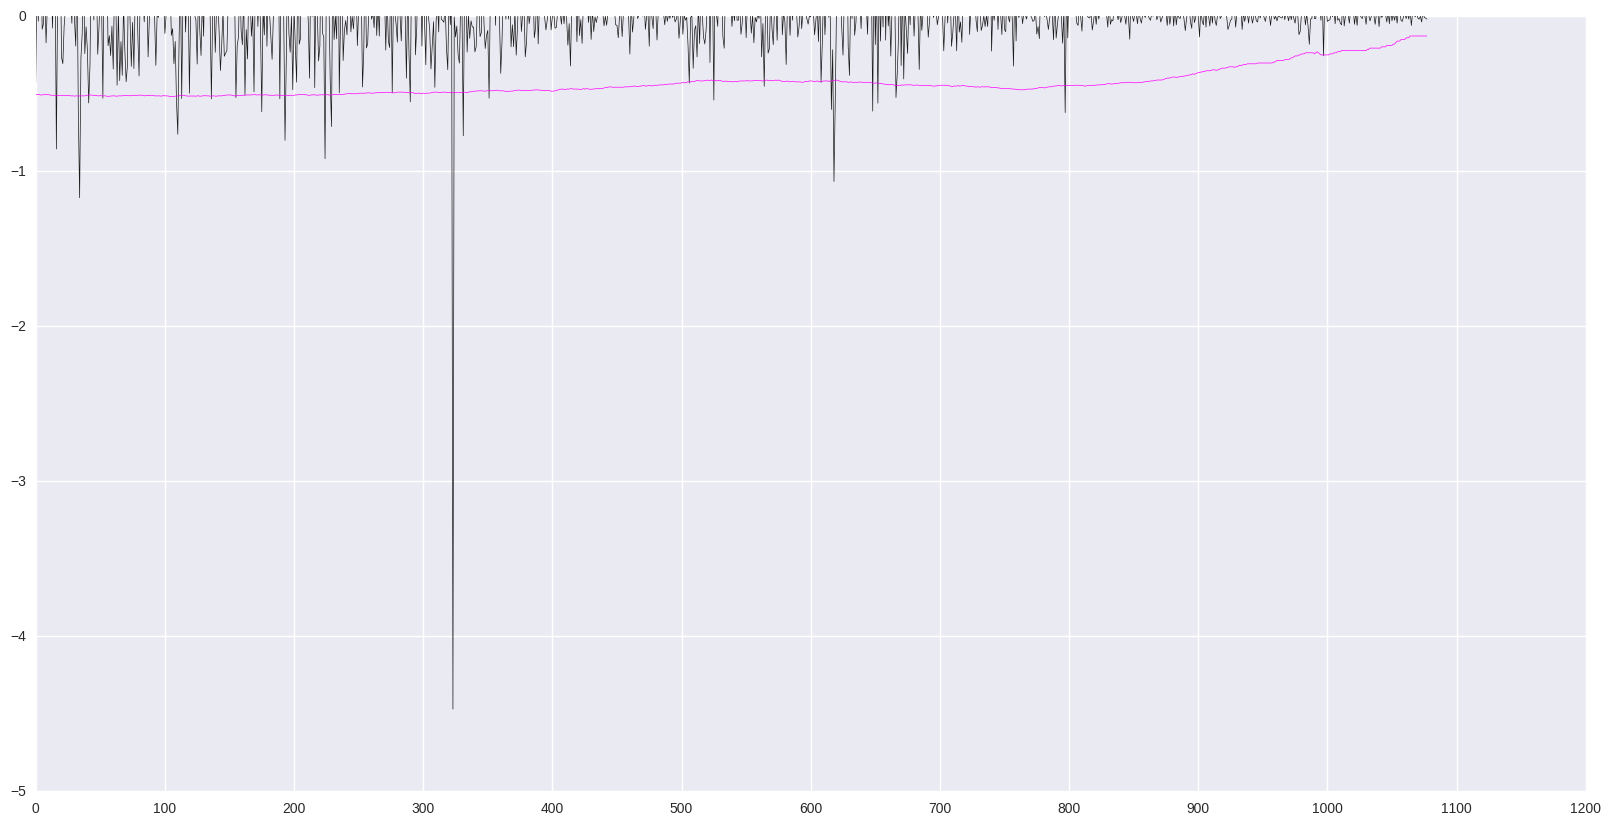

In [68]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a:].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['POTPareto'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

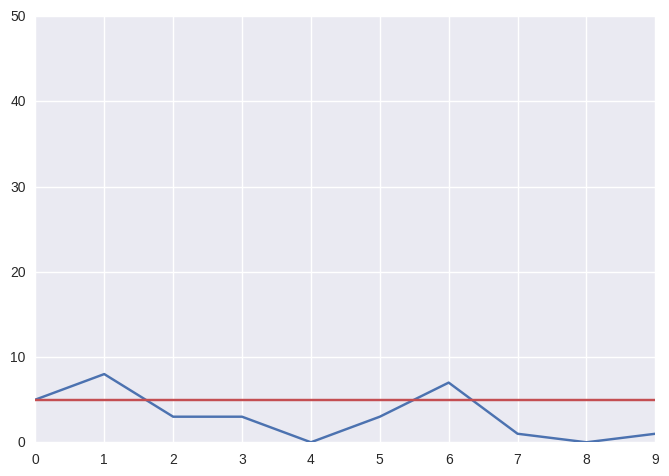

In [69]:
# Compute number of violation

pot_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['POTPareto'][i * 100 +j]:
            _sum += 1
    pot_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(pot_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 7

In [70]:
data = pd.read_csv('../data/var_risk_metrics_BRLUSD_252.csv')
b = 'BRLUSD' # 'CHFEUR' 'DKKEUR' 'CZKEUR' 'BRLUSD'
c = -5.e+0
d = b + 'LogRtn'
prices[d] = (np.log(prices[b].shift(1)) - np.log(prices[b])) * 100.

([<matplotlib.axis.XTick at 0x7fdefd0db0d0>,
 <a list of 13 Text xticklabel objects>)

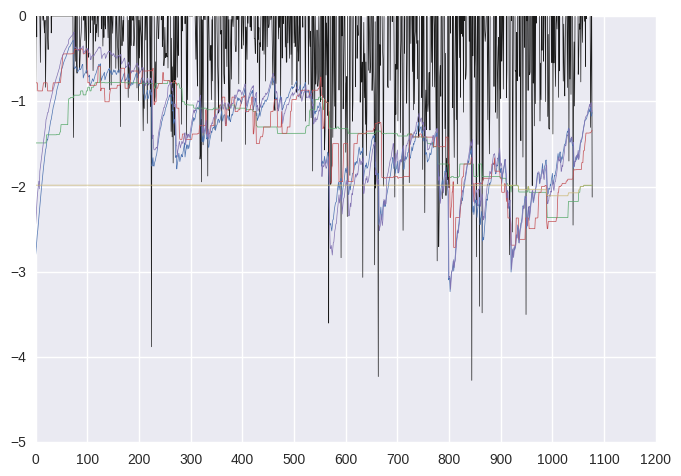

In [71]:
plt.plot(prices[d][a:].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['Riskmetrics'],linewidth=.5)
#plt.plot(data['GARCH'],linewidth=.5)
plt.plot(data['HistSimul'],linewidth=.5)
plt.plot(data['HistSimulWght'],linewidth=.5)
plt.plot(data['HistSimulVolWght'],linewidth=.5)
plt.plot(data['POTPareto'],linewidth=.5)

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

([<matplotlib.axis.XTick at 0x7fdefc9f6350>,
 <a list of 13 Text xticklabel objects>)

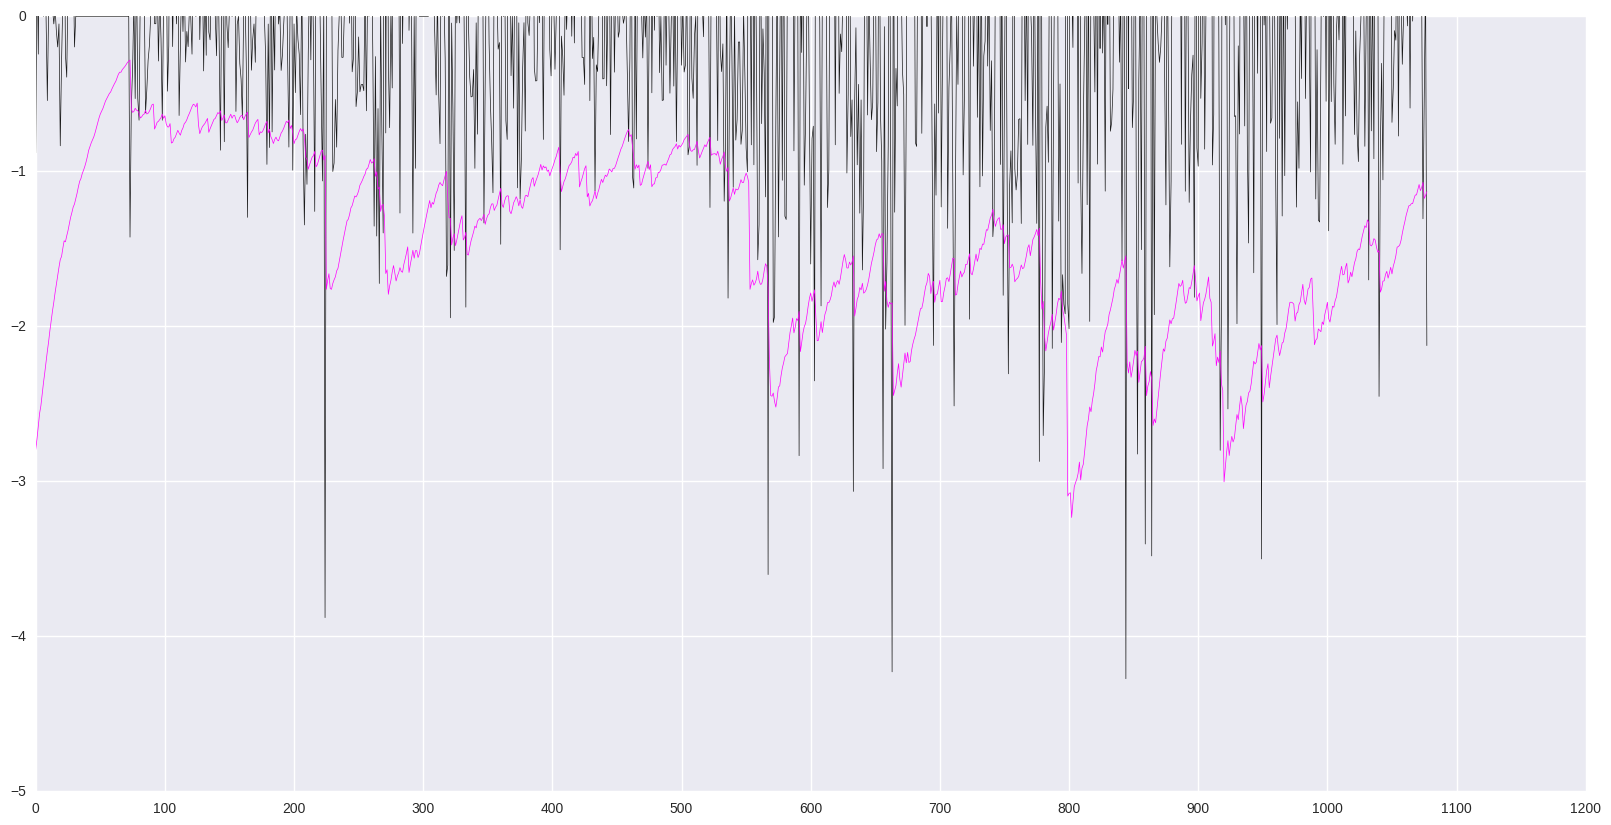

In [72]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a:].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['Riskmetrics'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

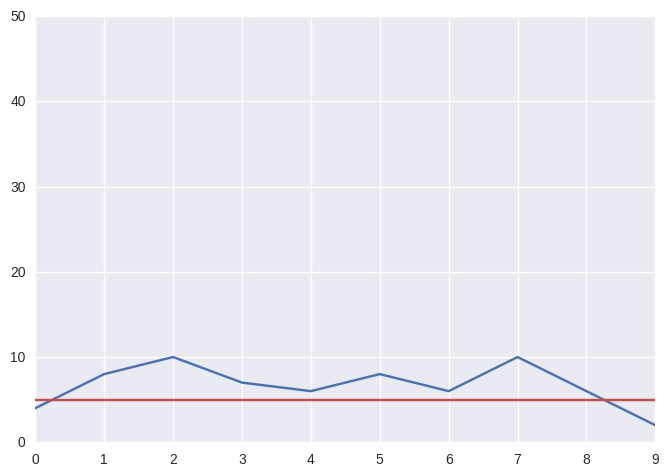

In [73]:
# Compute number of violation

risk_metrics_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['Riskmetrics'][i * 100 +j]:
            _sum += 1
    risk_metrics_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(risk_metrics_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 0

([<matplotlib.axis.XTick at 0x7fdefc998f90>,
 <a list of 13 Text xticklabel objects>)

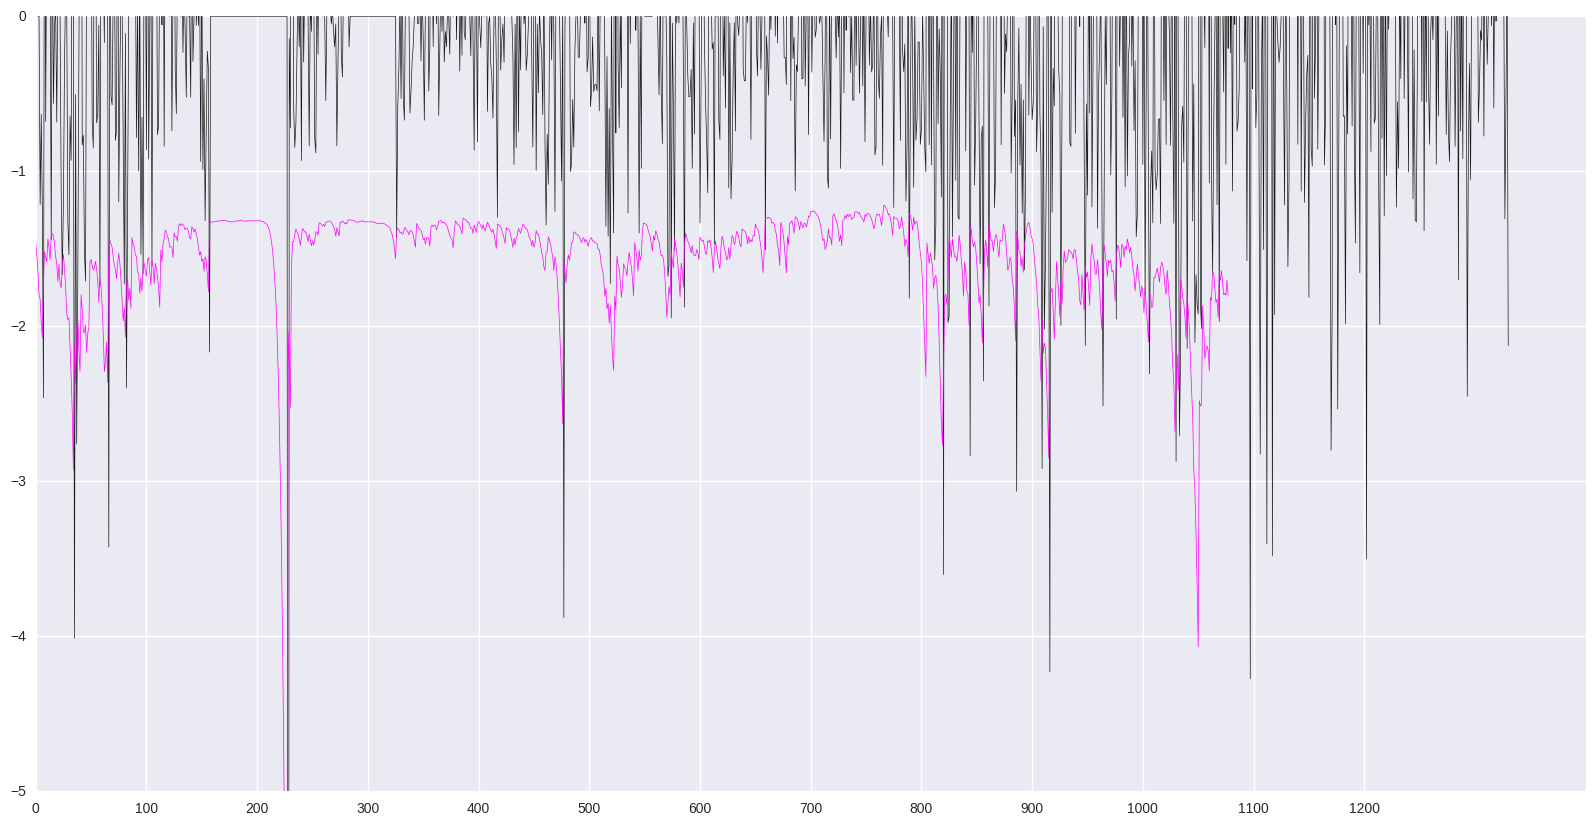

In [74]:
plt.figure(figsize=(20,10))
plt.plot(prices[d].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['GARCH'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

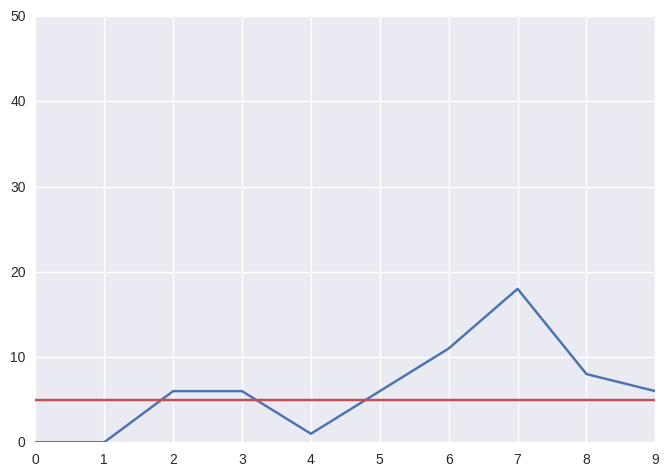

In [75]:
# Compute number of violation

garch_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['GARCH'][i * 100 +j]:
            _sum += 1
    garch_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(garch_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 0

([<matplotlib.axis.XTick at 0x7fdefc7672d0>,
 <a list of 13 Text xticklabel objects>)

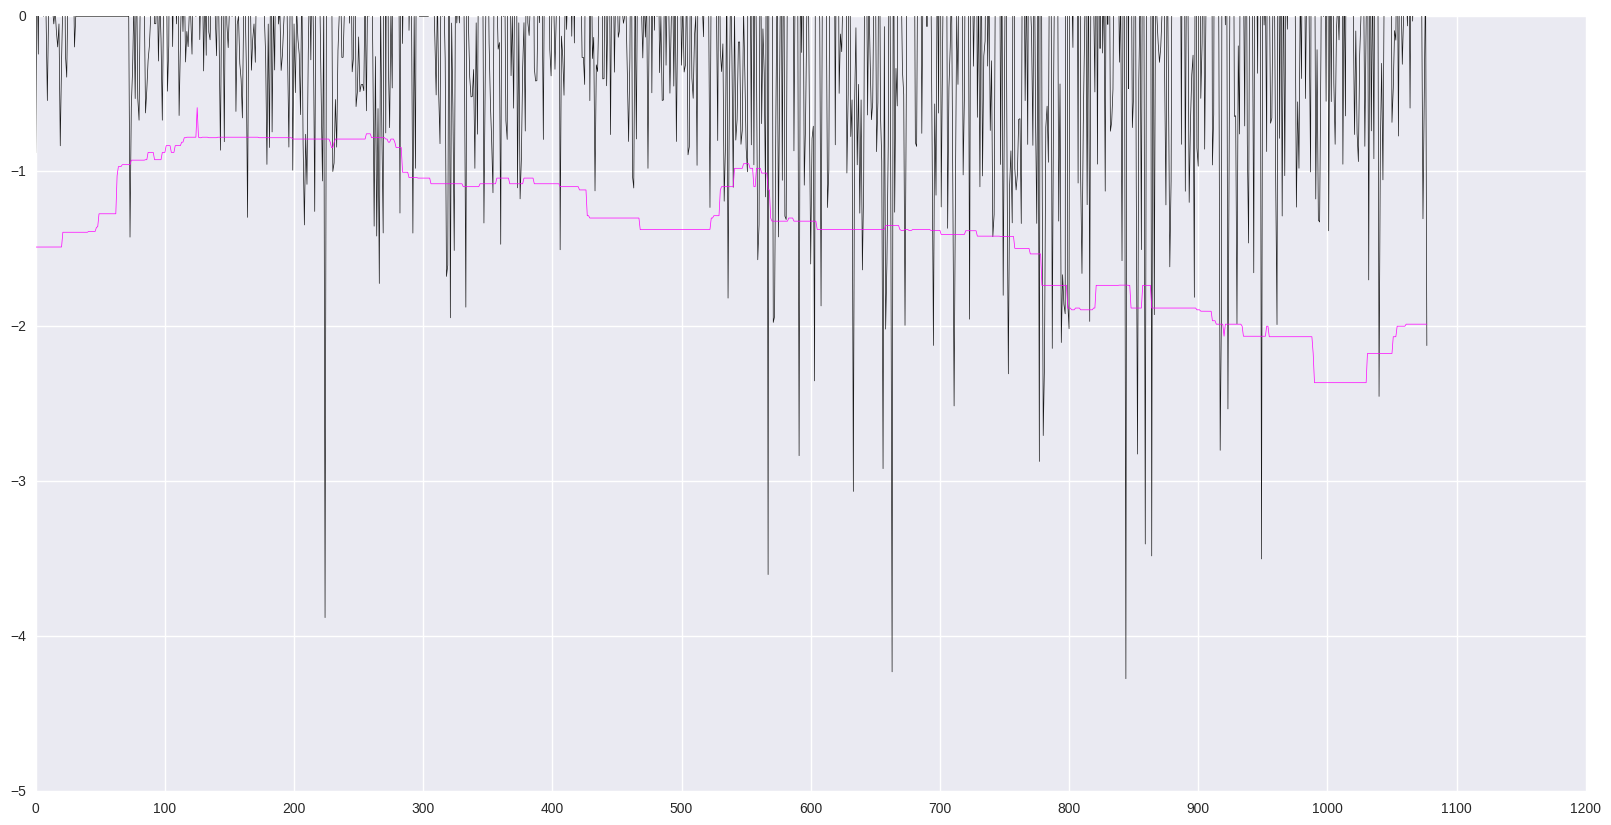

In [76]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a:].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['HistSimul'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

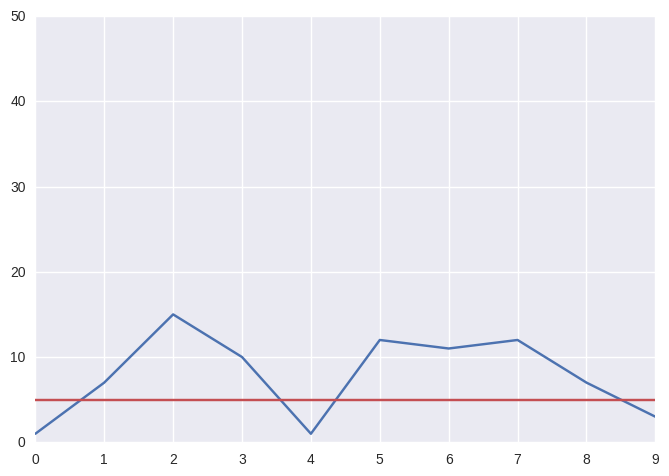

In [77]:
# Compute number of violation

hs_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['HistSimul'][i * 100 +j]:
            _sum += 1
    hs_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(hs_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 3

([<matplotlib.axis.XTick at 0x7fdefc59ac90>,
 <a list of 13 Text xticklabel objects>)

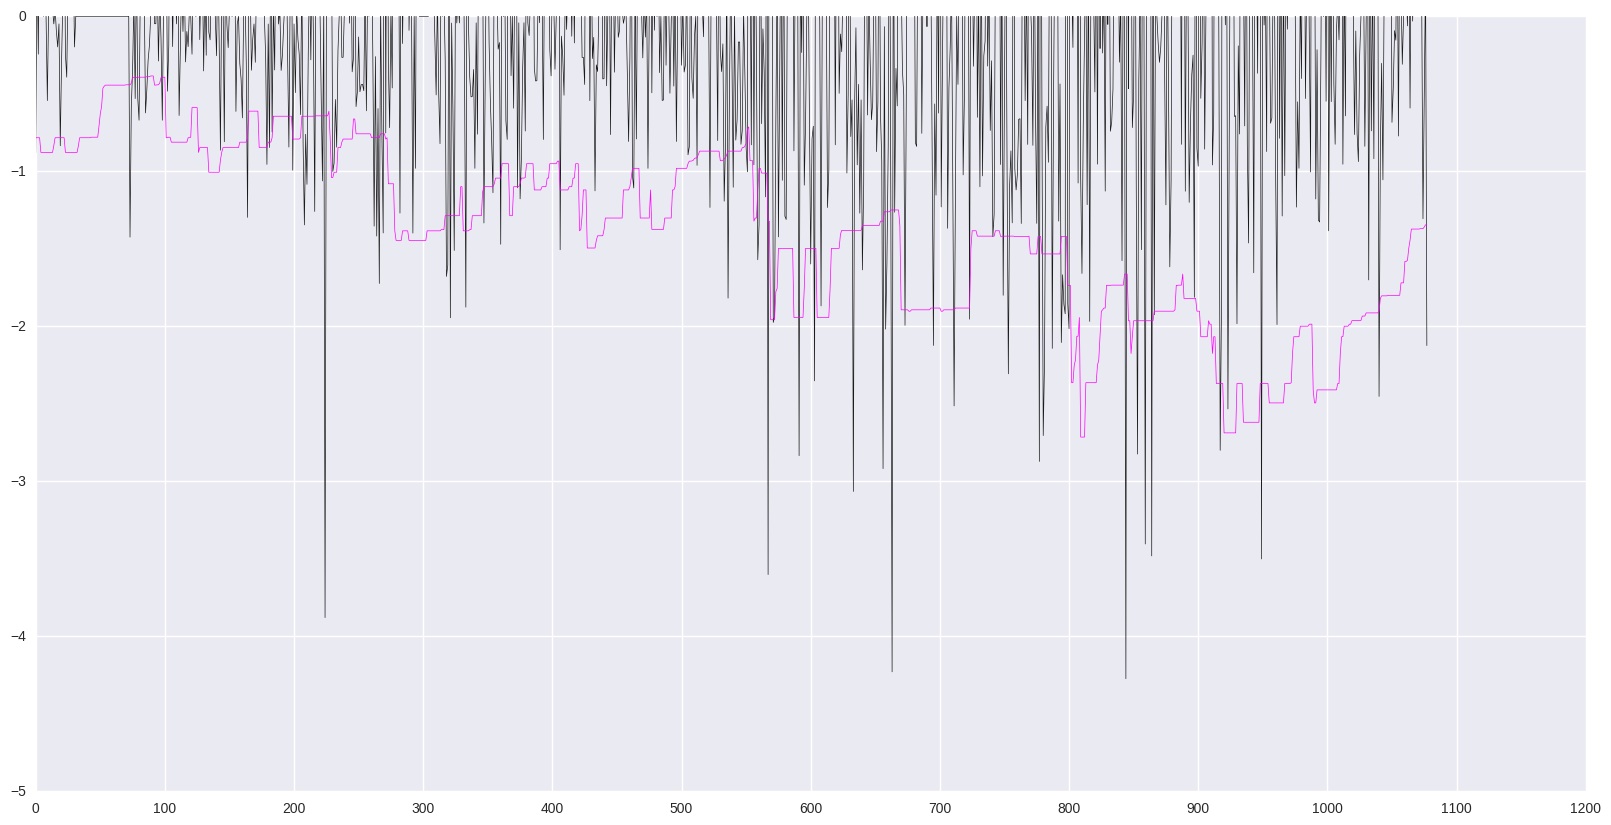

In [78]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a:].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['HistSimulWght'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

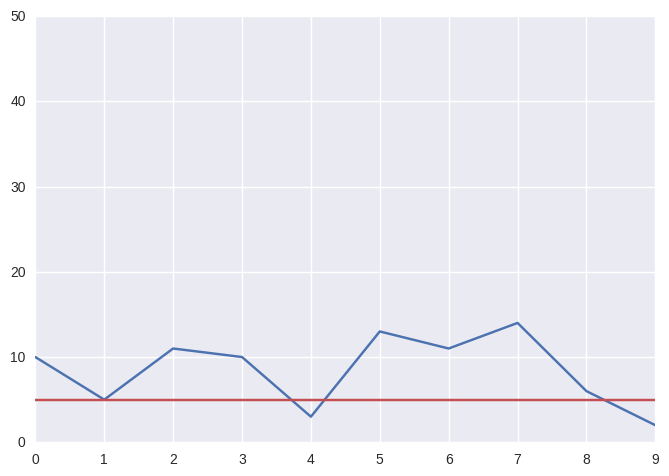

In [79]:
# Compute number of violation

hs_time_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['HistSimulWght'][i * 100 +j]:
            _sum += 1
    hs_time_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(hs_time_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 3

([<matplotlib.axis.XTick at 0x7fdefc88b990>,
 <a list of 13 Text xticklabel objects>)

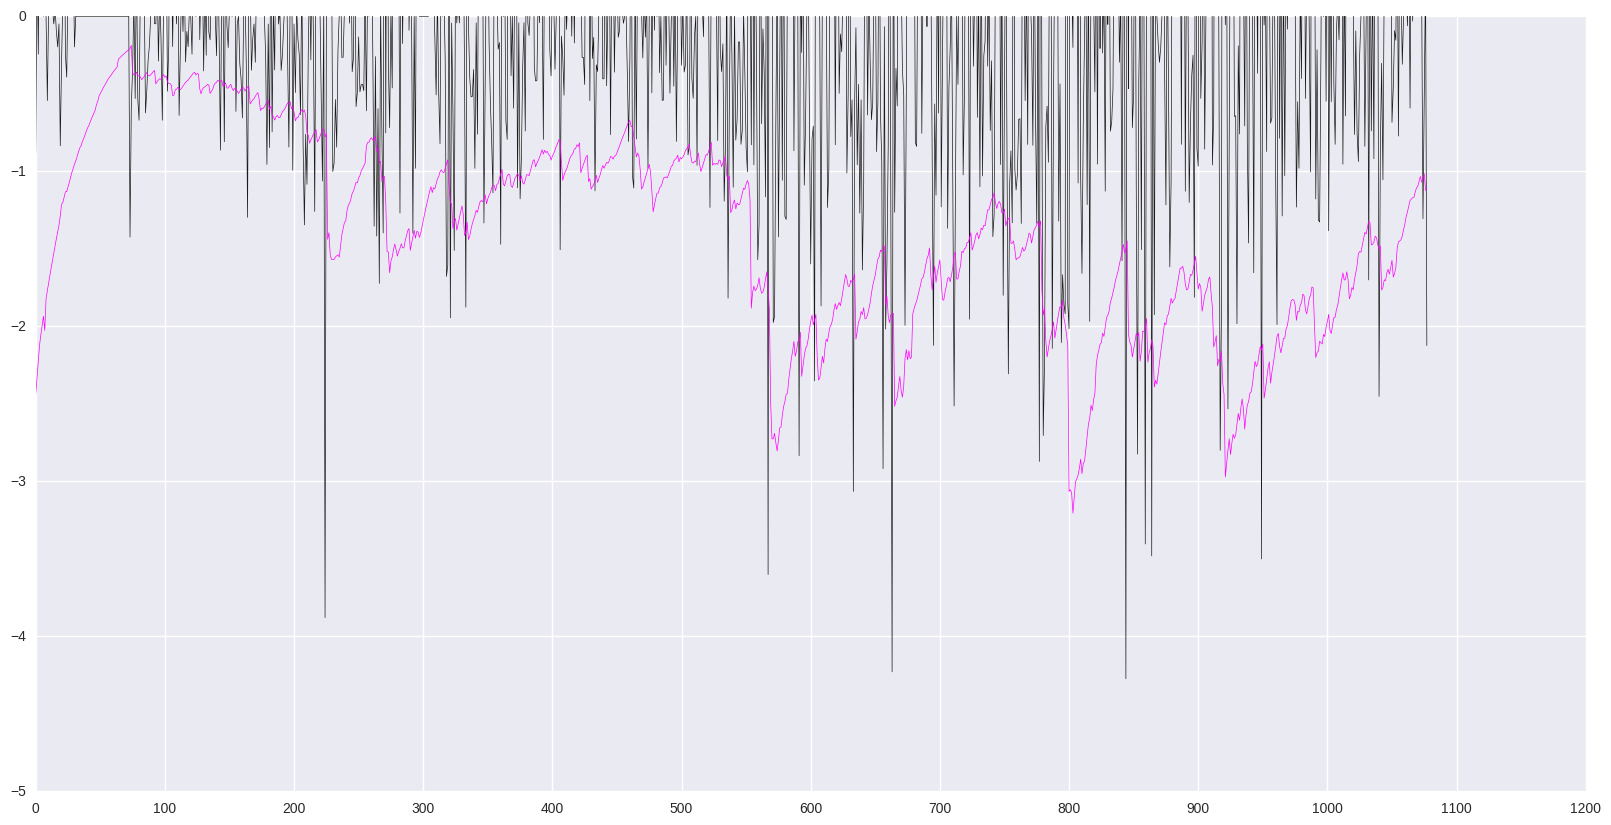

In [80]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a:].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['HistSimulVolWght'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

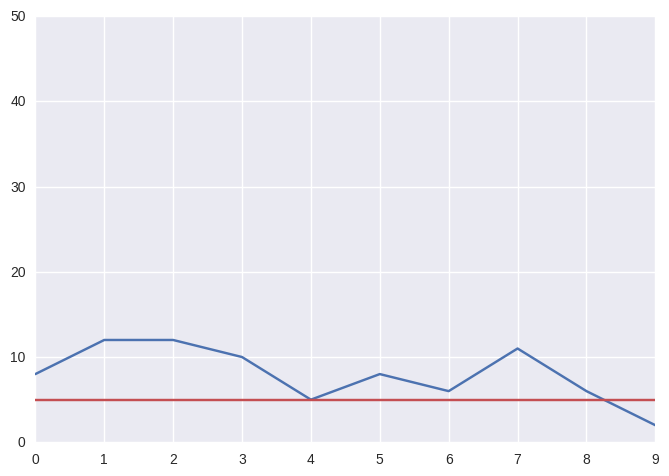

In [81]:
# Compute number of violation

hs_vol_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['HistSimulVolWght'][i * 100 +j]:
            _sum += 1
    hs_vol_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(hs_vol_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 2

([<matplotlib.axis.XTick at 0x7fdefc2052d0>,
 <a list of 13 Text xticklabel objects>)

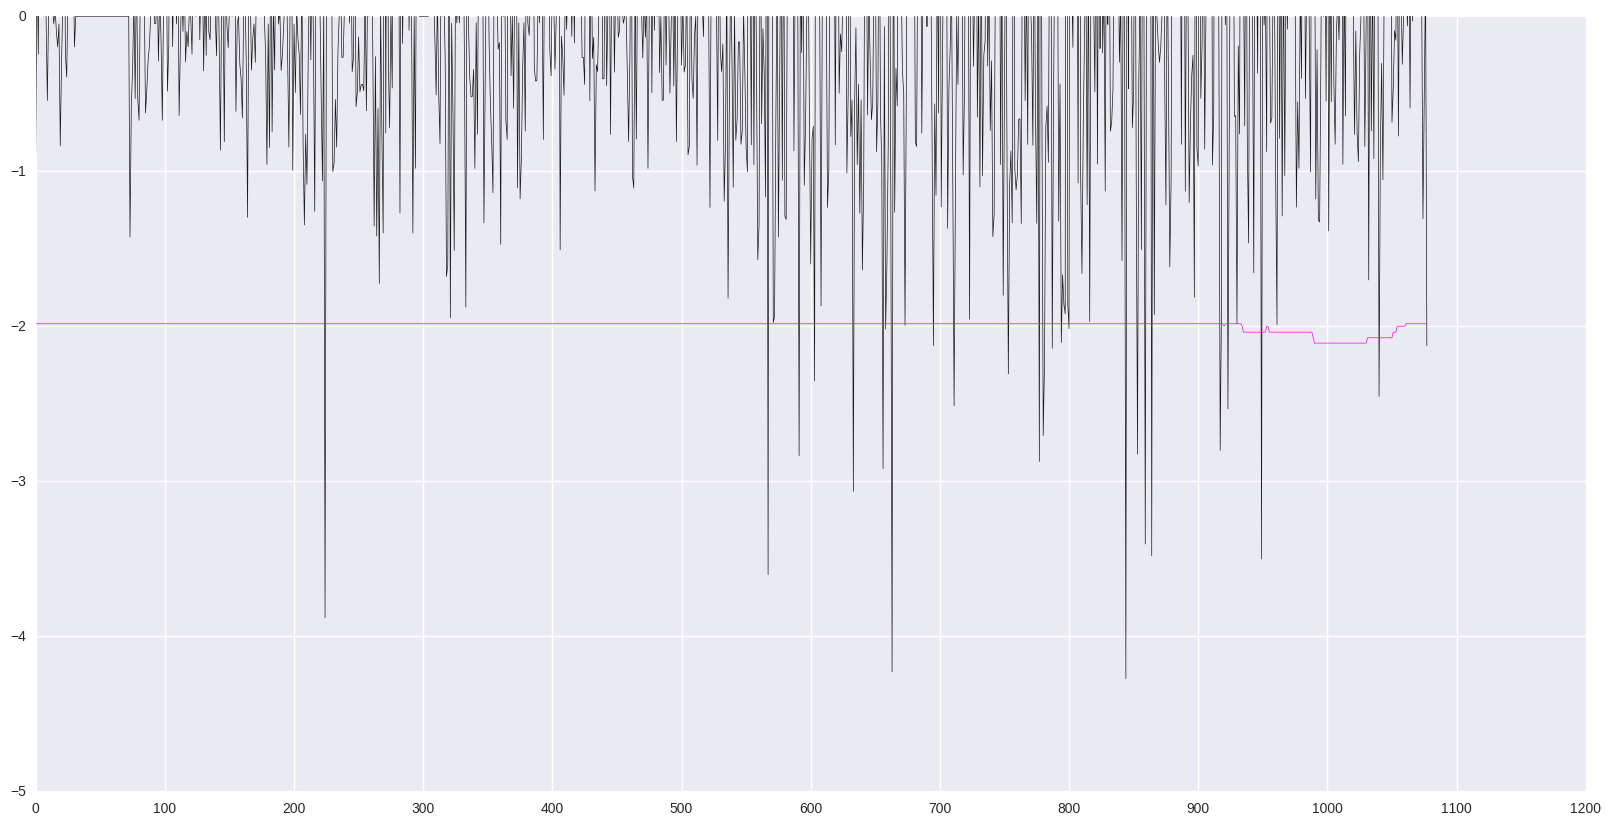

In [82]:
plt.figure(figsize=(20,10))
plt.plot(prices[d][a:].reset_index(drop=True),linewidth=.5, color='k')

plt.plot(data['POTPareto'],linewidth=.5, color = 'fuchsia')

plt.ylim([c, .0])
plt.xticks(np.linspace(0, 1200, 13, endpoint=True))

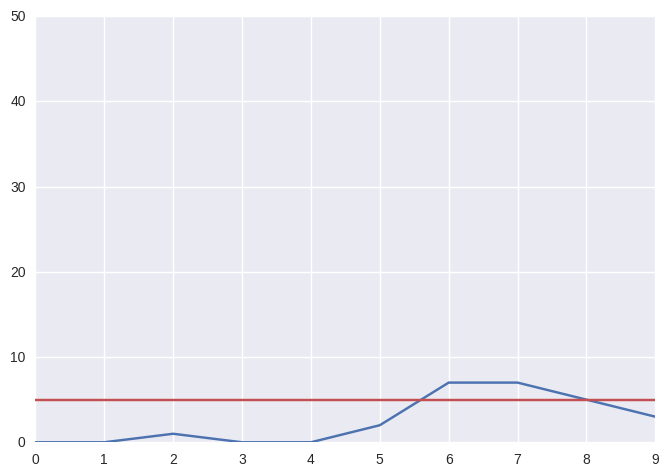

In [83]:
# Compute number of violation

pot_violation = []

e = (len(prices) - a)//100 

for i in xrange(e):
    _sum = 0
    for j in xrange(100):
        if prices[d][a + i * 100 +j] < data['POTPareto'][i * 100 +j]:
            _sum += 1
    pot_violation.append(_sum)    
    
plt.ylim([0, 50])

plt.plot(pot_violation)
plt.plot([5,5,5,5,5,5,5,5,5,5], color = 'r') # count 5